In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
########################################
# Charts - Setup
########################################

plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab10')

approach_list = ['A', 'B', 'C', 'B+', 'C+']
number_of_approaches = len(approach_list)

In [3]:
########################################
# DataFrame List Setup Function
########################################

def setup_df_list(log_path):
    full_df = pd.read_csv(log_path, sep=';')
    df = full_df[['batch', 'precision', 'recall', 'f1',
                  'total_errors', 'correct_repairs', 'total_repairs']]

    header_rows_df = full_df.loc[full_df['infer_mode'] == 'infer_mode']
    header_row_numbers = header_rows_df.index.to_list()
    
    maximum_remaining_errors = 0

    df_list = []
    beginning = 0
    for row_number in header_row_numbers:
        end = row_number - 1

        tmp_df = df.loc[beginning:end]
        tmp_df = tmp_df.astype({'batch': 'int32', 'precision': 'float64', 'recall': 'float64', 'f1': 'float64',
                                'total_errors': 'float64', 'correct_repairs': 'float64', 'total_repairs': 'int32'})
        # Generates the number of remaining errors in the dataset at each batch.
        tmp_df['remaining_errors'] = tmp_df['total_errors'] - tmp_df['correct_repairs'] + (tmp_df['total_repairs'] - tmp_df['correct_repairs'])
        
        # Maximum number of remaining errors for delimiting the y-axis correctly later on.
        current_maximum_remaining_errors = tmp_df['remaining_errors'].max()
        if current_maximum_remaining_errors > maximum_remaining_errors:
            maximum_remaining_errors = current_maximum_remaining_errors

        df_list.append(tmp_df)
        beginning = row_number + 1

    tmp_df = df.loc[beginning:]
    tmp_df = tmp_df.astype({'batch': 'int32', 'precision': 'float64', 'recall': 'float64', 'f1': 'float64',
                            'total_errors': 'float64', 'correct_repairs': 'float64', 'total_repairs': 'int32'})
    # Generates the number of remaining errors in the dataset at each batch.
    tmp_df['remaining_errors'] = tmp_df['total_errors'] - tmp_df['correct_repairs'] + (tmp_df['total_repairs'] - tmp_df['correct_repairs'])

    df_list.append(tmp_df)

    return df_list, maximum_remaining_errors

In [4]:
########################################
# Chart Plotting Function
########################################

def plot_charts(dataset_name, df_list, percentage_list, maximum_remaining_errors, chart_columns = 2):
    number_of_percentages = len(percentage_list)

    for p in range(number_of_percentages):
        fig, axes = plt.subplots(number_of_approaches, chart_columns,
                                 sharex=False, sharey=False,
                                 figsize=(chart_columns * 8, number_of_approaches * 7))

        for a in range(number_of_approaches):
            current_df = df_list[a]

            # Plots the chart on the left, regarding quality metrics.
            axes[a, 0].plot('batch', 'precision',
                            data=current_df[p], marker='', color=palette(1), label='precision', linewidth=3)
            axes[a, 0].plot('batch', 'recall',
                            data=current_df[p], marker='', color=palette(2), label='recall', linewidth=3)
            axes[a, 0].plot('batch', 'f1',
                            data=current_df[p], marker='', color=palette(3), label='f1', linewidth=3)

            # Plots the chart on the right, regarding remaining errors per batch.
            axes[a, 1].plot('batch', 'remaining_errors',
                            data=current_df[p], marker='', color=palette(4), label='errors', linewidth=3)

            # Sets the titles.
            axes[a, 0].set(title='{} - Batches of {}% - {} - Quality'.format(dataset_name, str(percentage_list[p]), approach_list[a]))
            axes[a, 1].set(title='{} - Batches of {}% - {} - Errors'.format(dataset_name, str(percentage_list[p]), approach_list[a]))

            # Sets the x-axis and y-axis labels.
            axes[a, 0].set(xlabel='Batch')
            axes[a, 1].set(xlabel='Batch')
            axes[a, 0].set(ylabel='Percentage')
            axes[a, 1].set(ylabel='Remaining Errors')

            # Sets the legends.
            axes[a, 0].legend(loc='best')
            axes[a, 1].legend(loc='best')
            
            # Sets the ticks.
            if percentage_list[p] == 1:
                axes[a, 0].set_xticks(np.arange(1, (100 / percentage_list[p]) + 10, 10))
                axes[a, 1].set_xticks(np.arange(1, (100 / percentage_list[p]) + 10, 10))
            else:
                axes[a, 0].set_xticks(np.arange(1, (100 / percentage_list[p]) + 1, 1))
                axes[a, 1].set_xticks(np.arange(1, (100 / percentage_list[p]) + 1, 1))

            if dataset_name == 'nypd6':
                axes[a, 1].set_yticks(np.arange(0, maximum_remaining_errors + 5000, 5000))
                axes[a, 1].set_yscale('log')
            else:
                axes[a, 1].set_yticks(np.arange(0, maximum_remaining_errors + 100, 100))

            axes[a, 0].set_yticks(np.arange(0, 1.1, 0.1))

        fig.tight_layout()

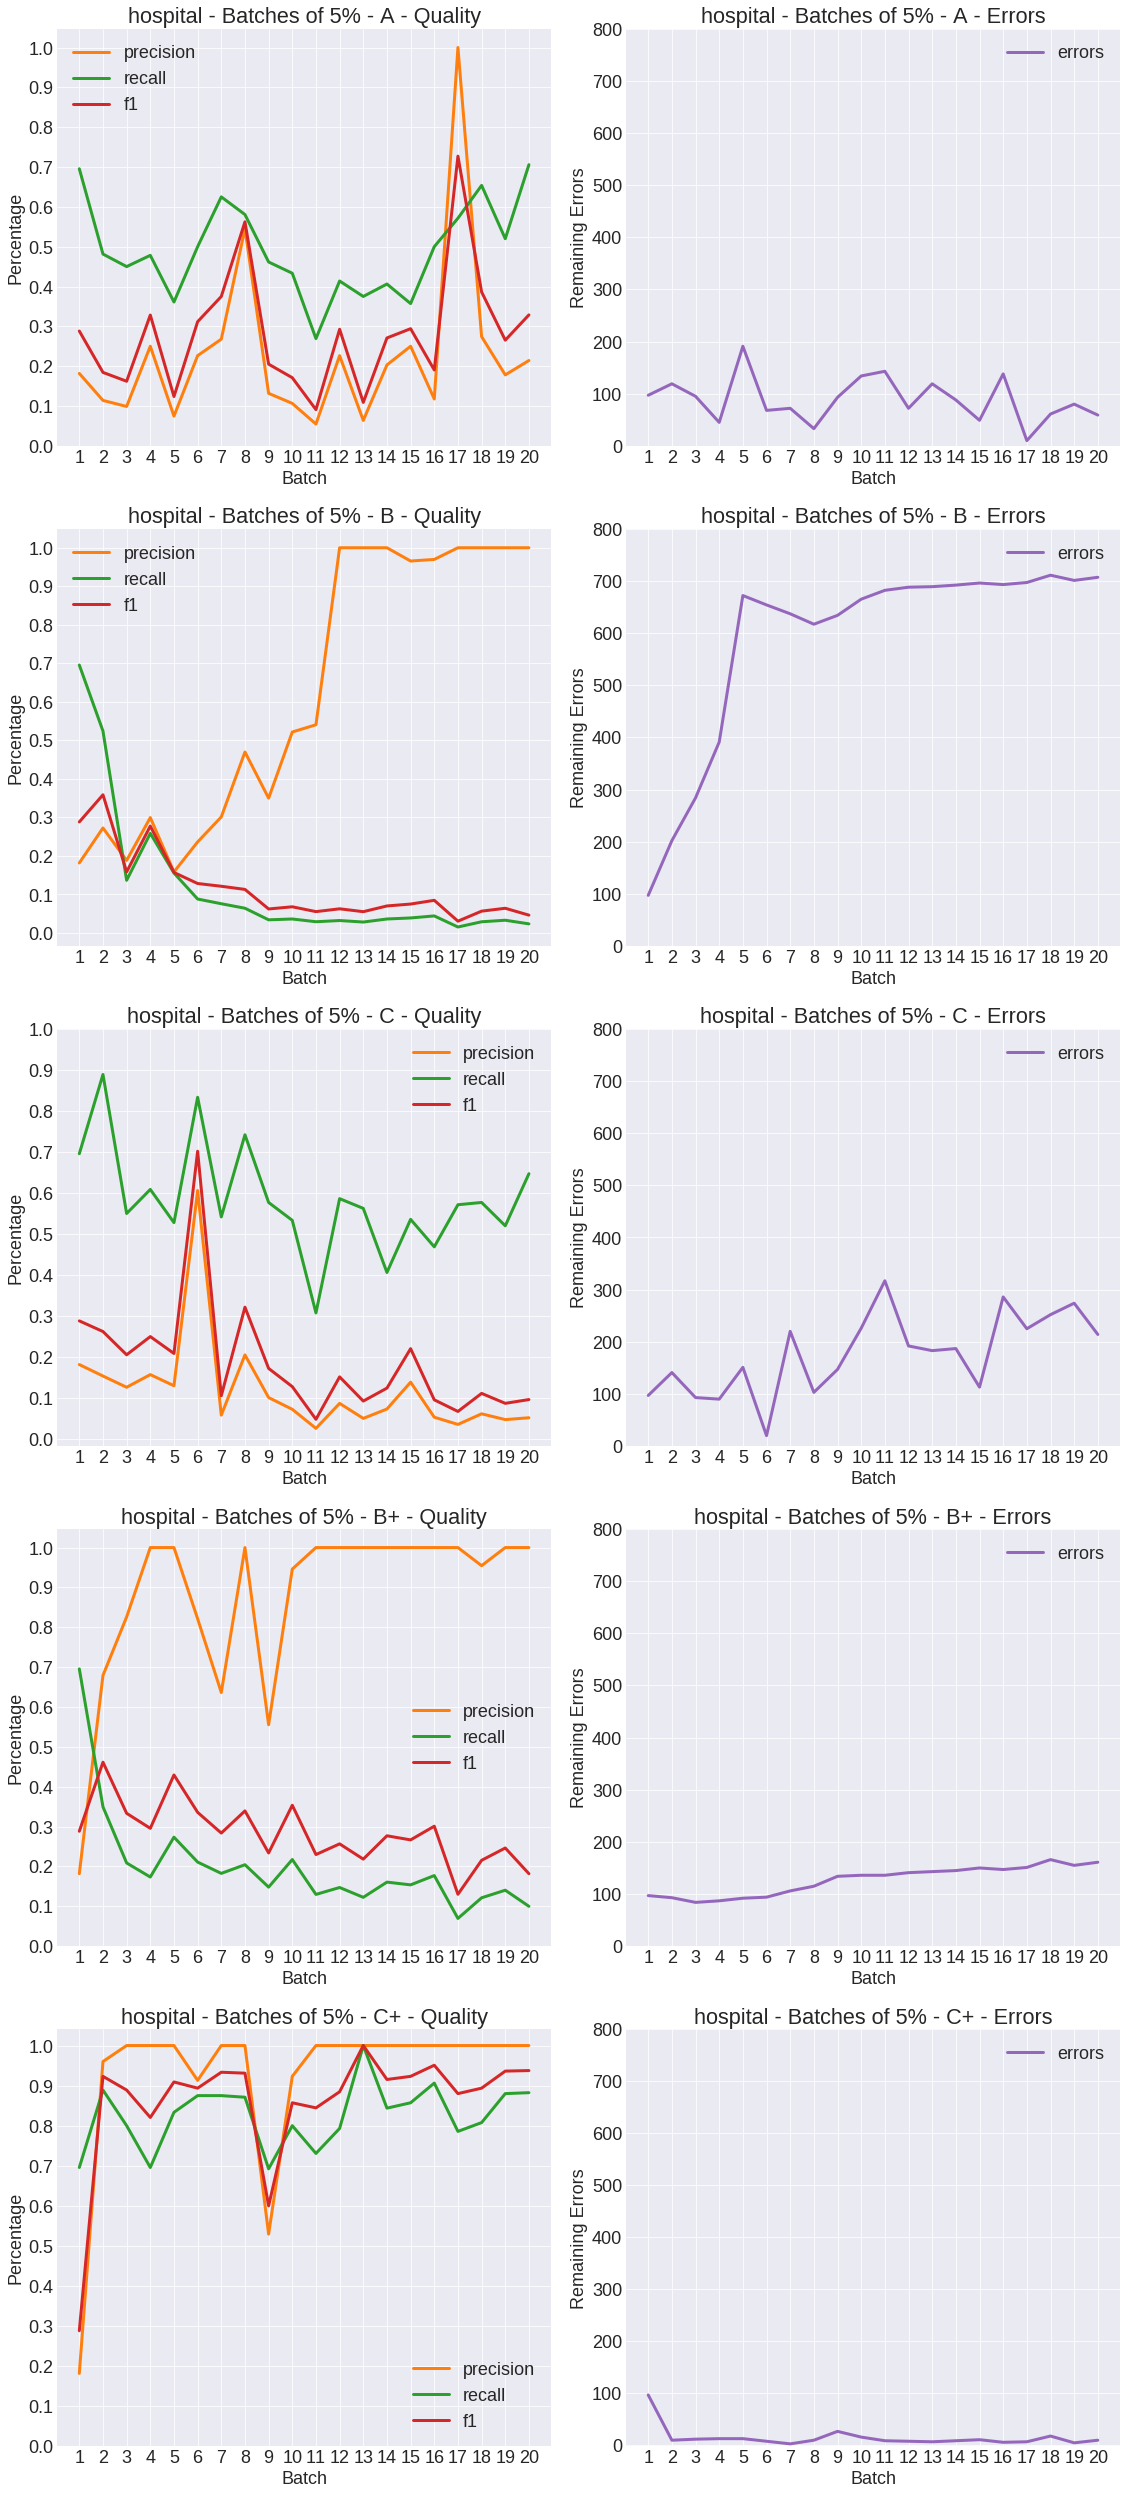

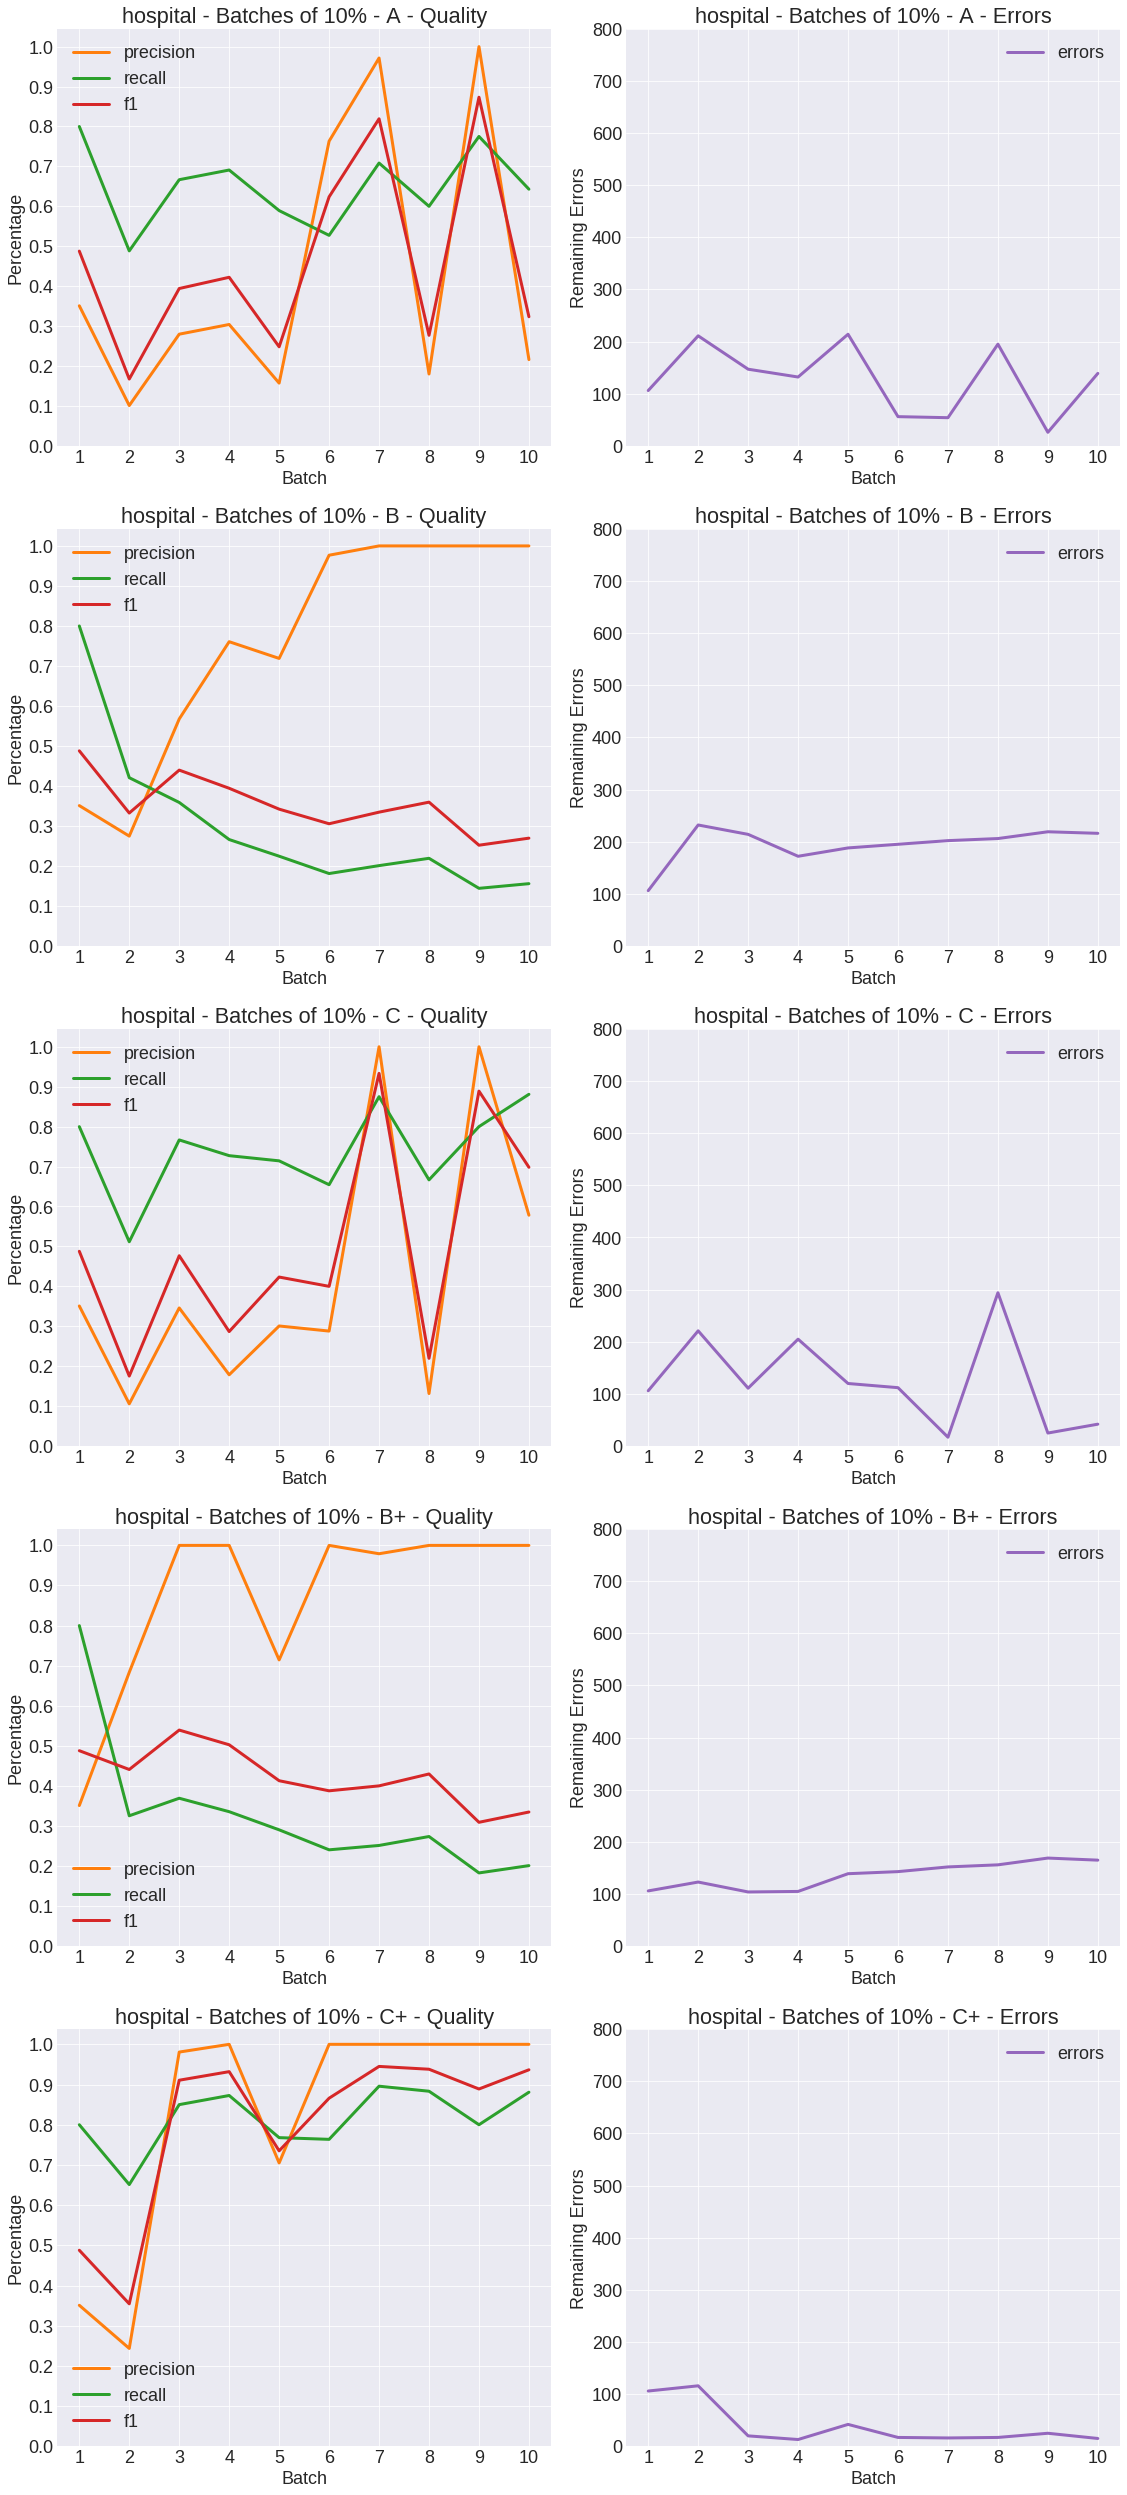

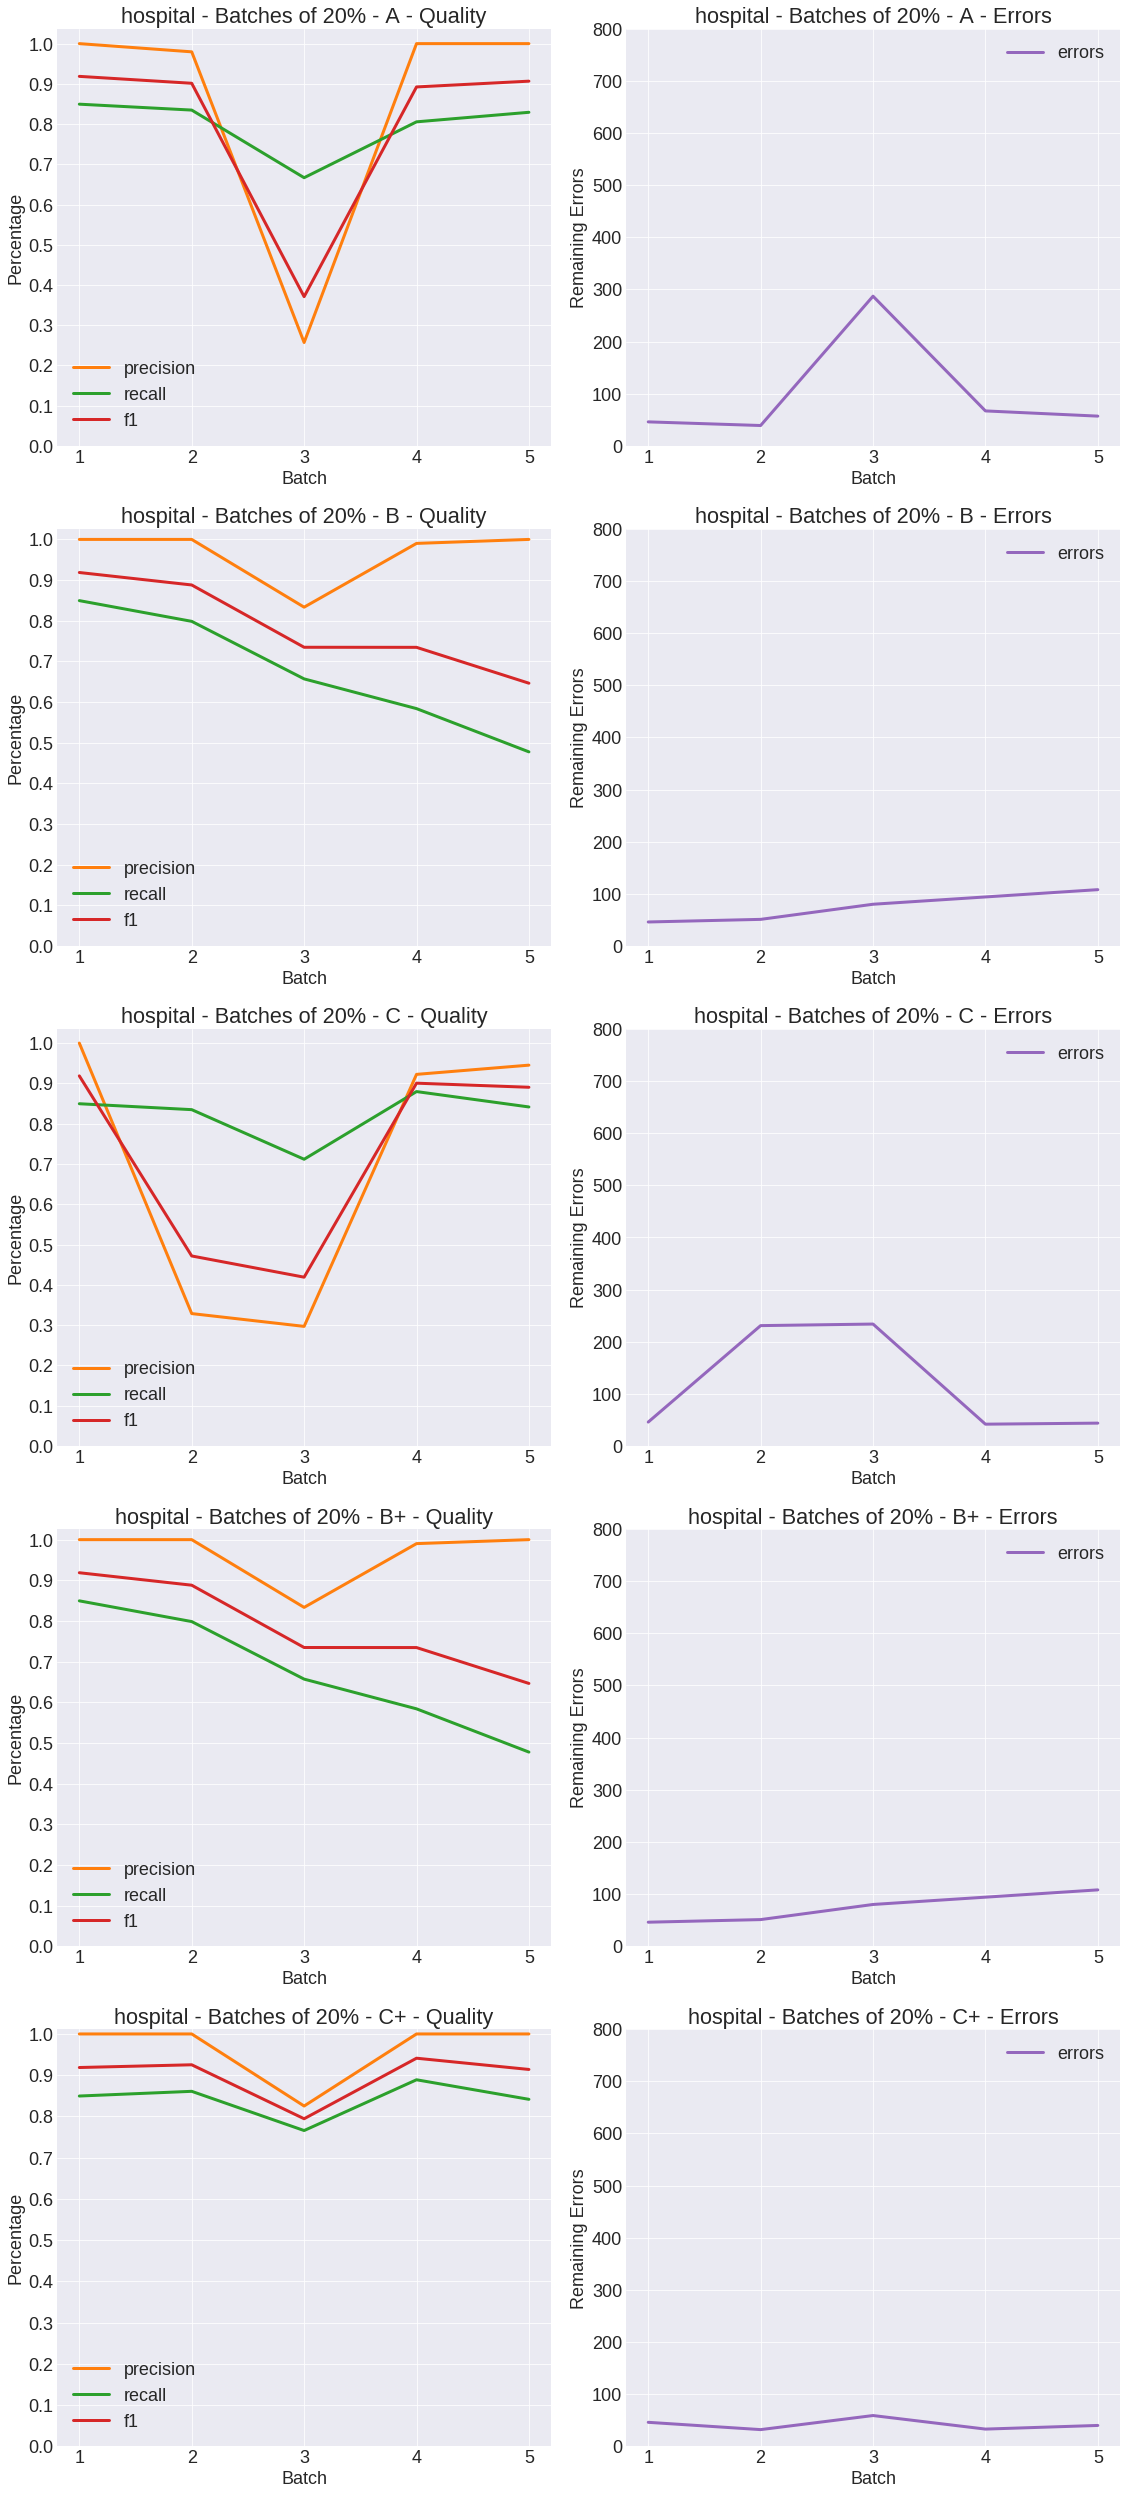

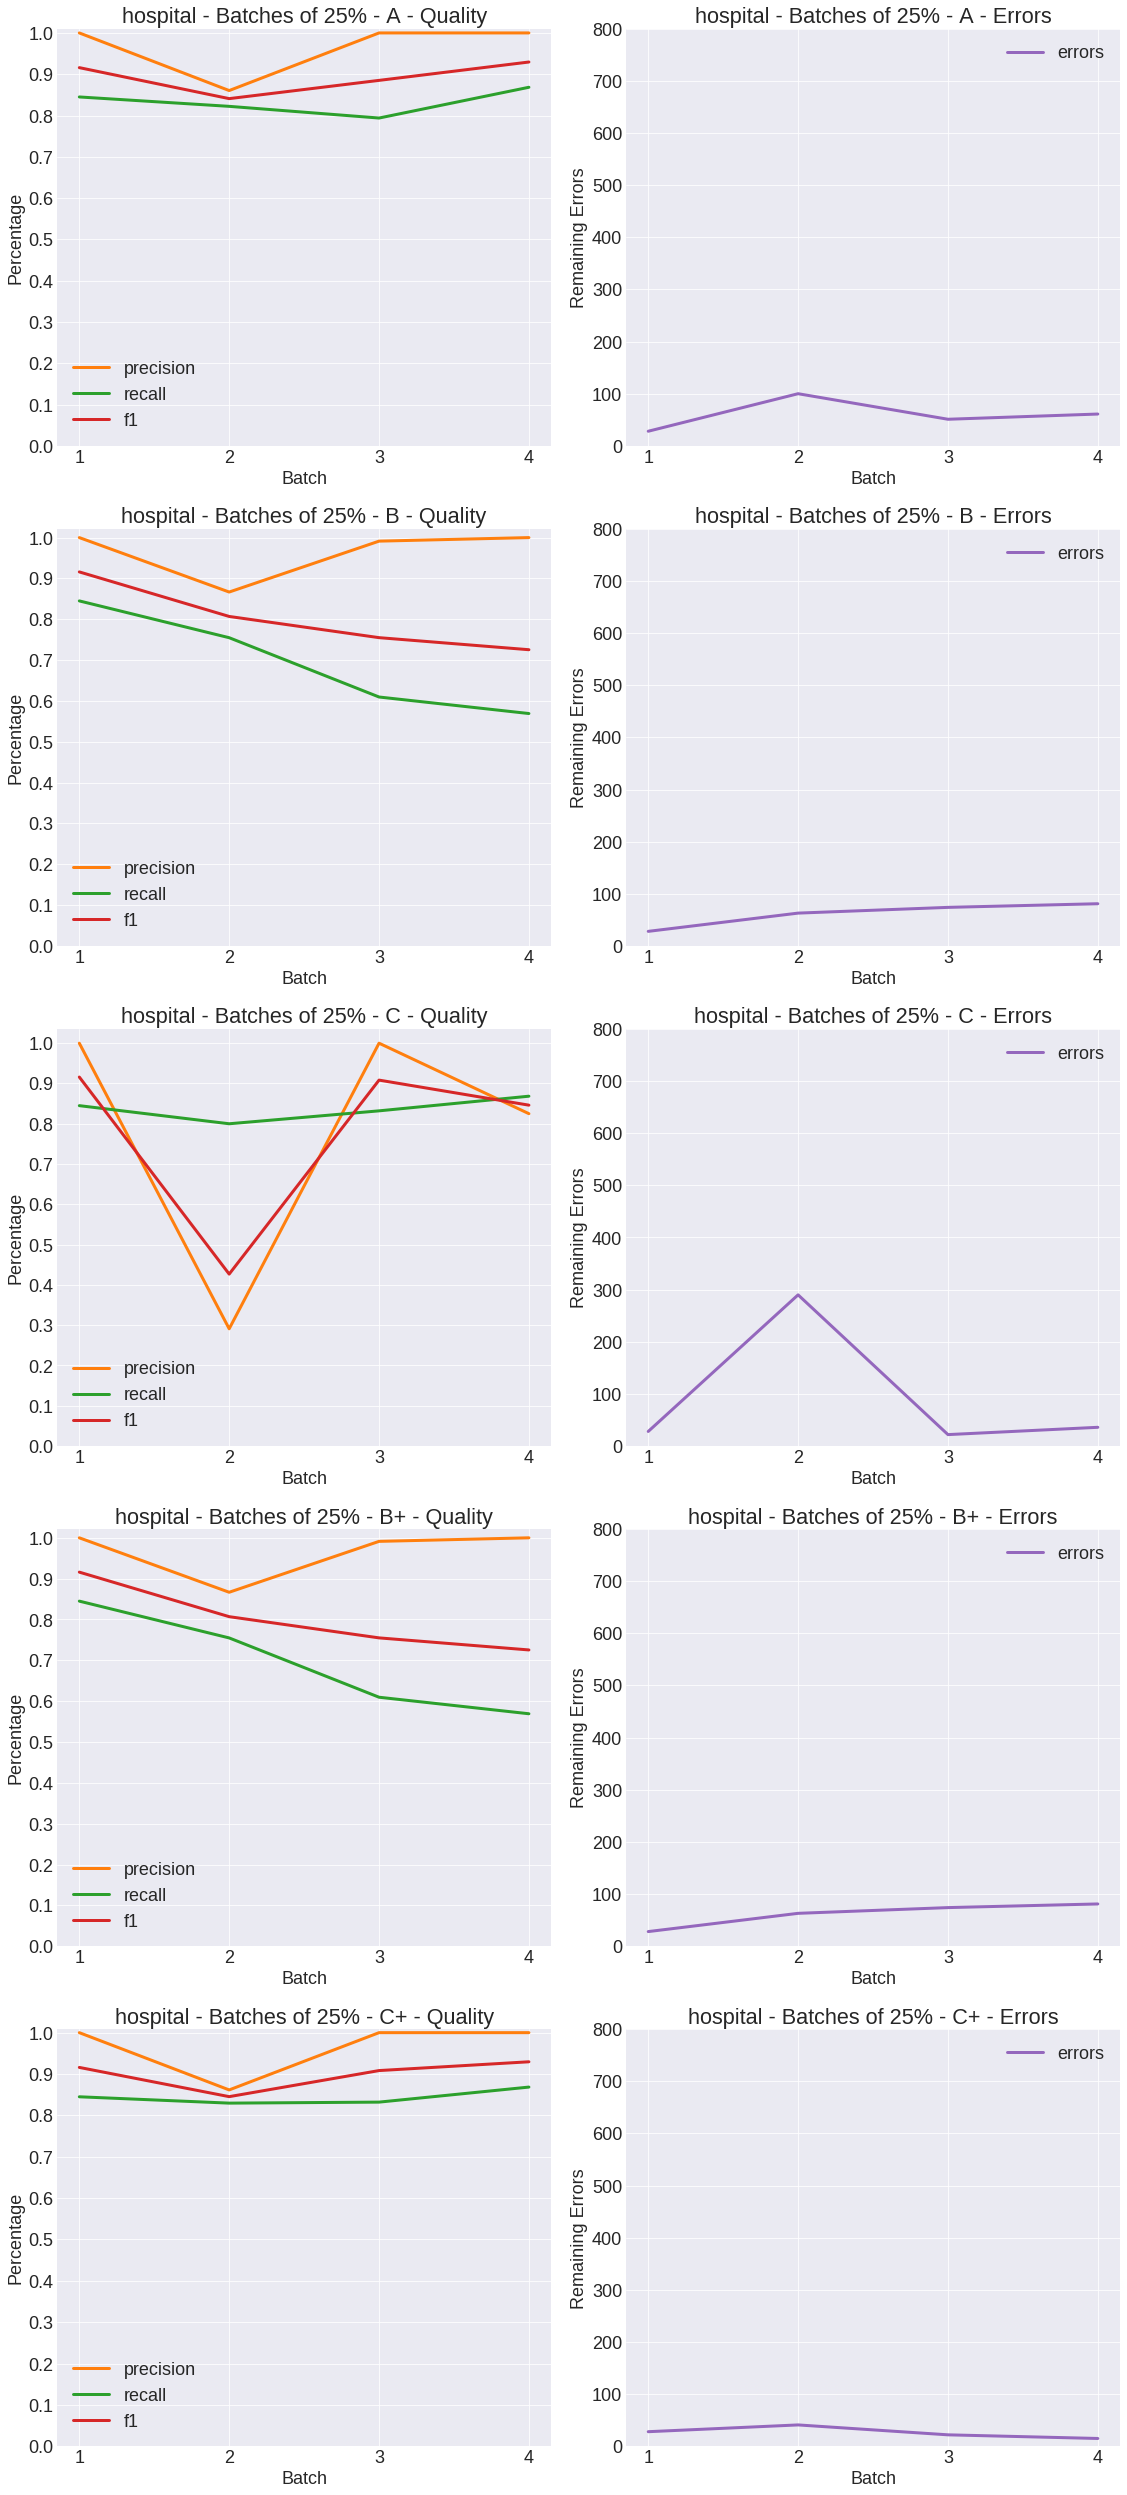

In [5]:
########################################
# hospital
########################################

hospital_a, hospital_maximum_errors_a = setup_df_list('hospital/co_a_quality_log.csv')
hospital_b, hospital_maximum_errors_b = setup_df_list('hospital/co_b_quality_log.csv')
hospital_c, hospital_maximum_errors_c = setup_df_list('hospital/co_c_quality_log.csv')
hospital_bplus, hospital_maximum_errors_bplus = setup_df_list('hospital/co_bplus_quality_log.csv')
hospital_cplus, hospital_maximum_errors_cplus = setup_df_list('hospital/co_cplus_quality_log.csv')

hospital_df_list = [hospital_a, hospital_b, hospital_c, hospital_bplus, hospital_cplus]

hospital_percentage_list = [5, 10, 20, 25]

hospital_maximum_remaining_errors = max(hospital_maximum_errors_a,
                                        hospital_maximum_errors_b,
                                        hospital_maximum_errors_c,
                                        hospital_maximum_errors_bplus,
                                        hospital_maximum_errors_cplus)

plot_charts('hospital', hospital_df_list, hospital_percentage_list, hospital_maximum_remaining_errors)

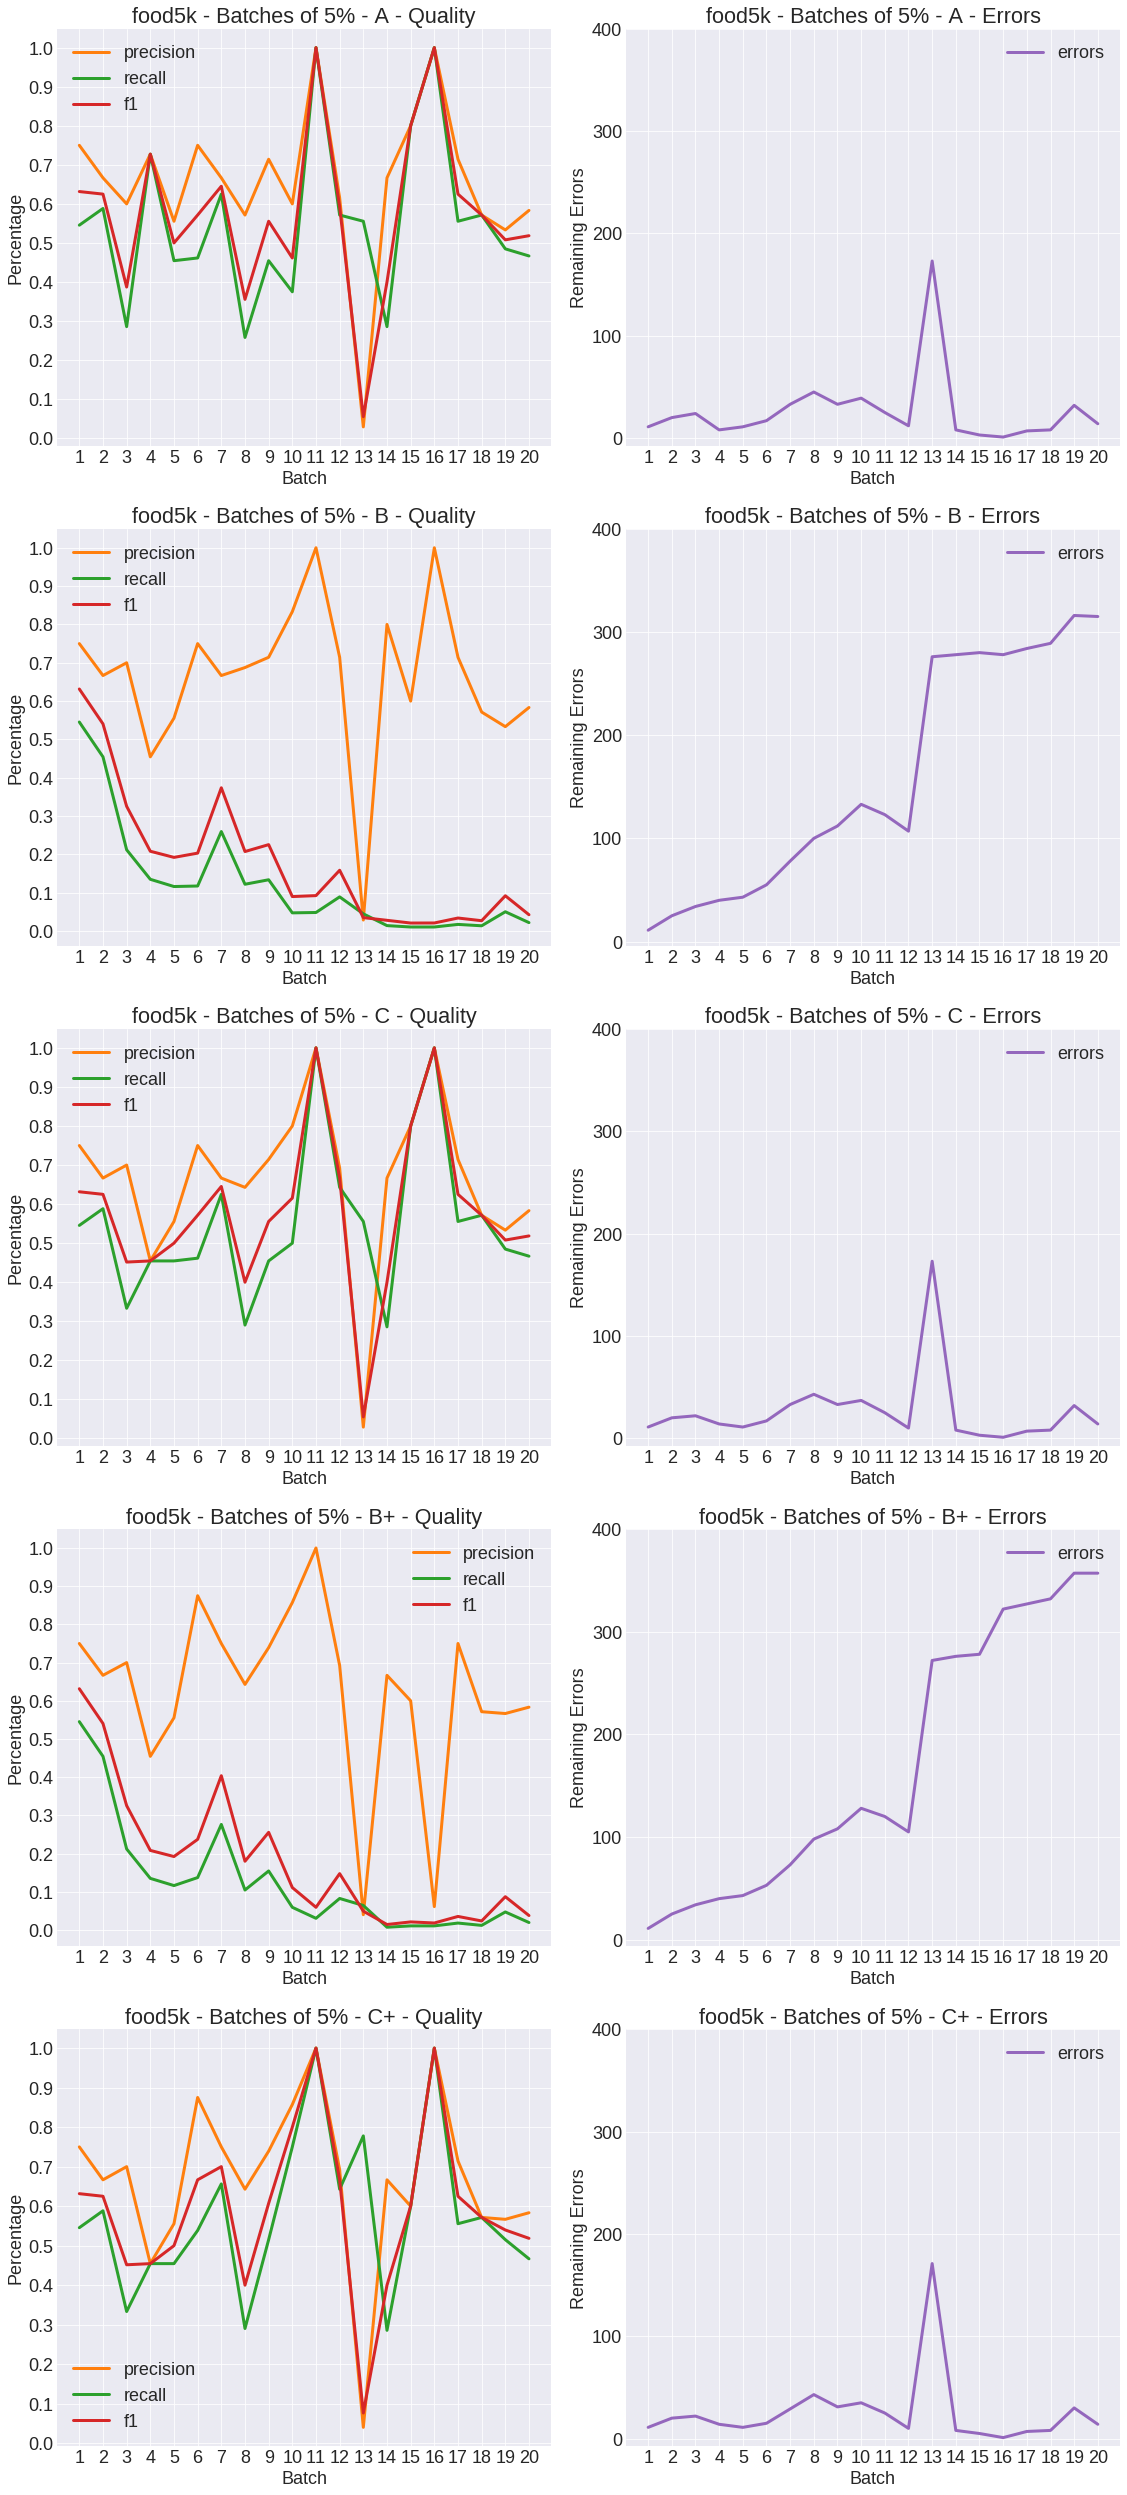

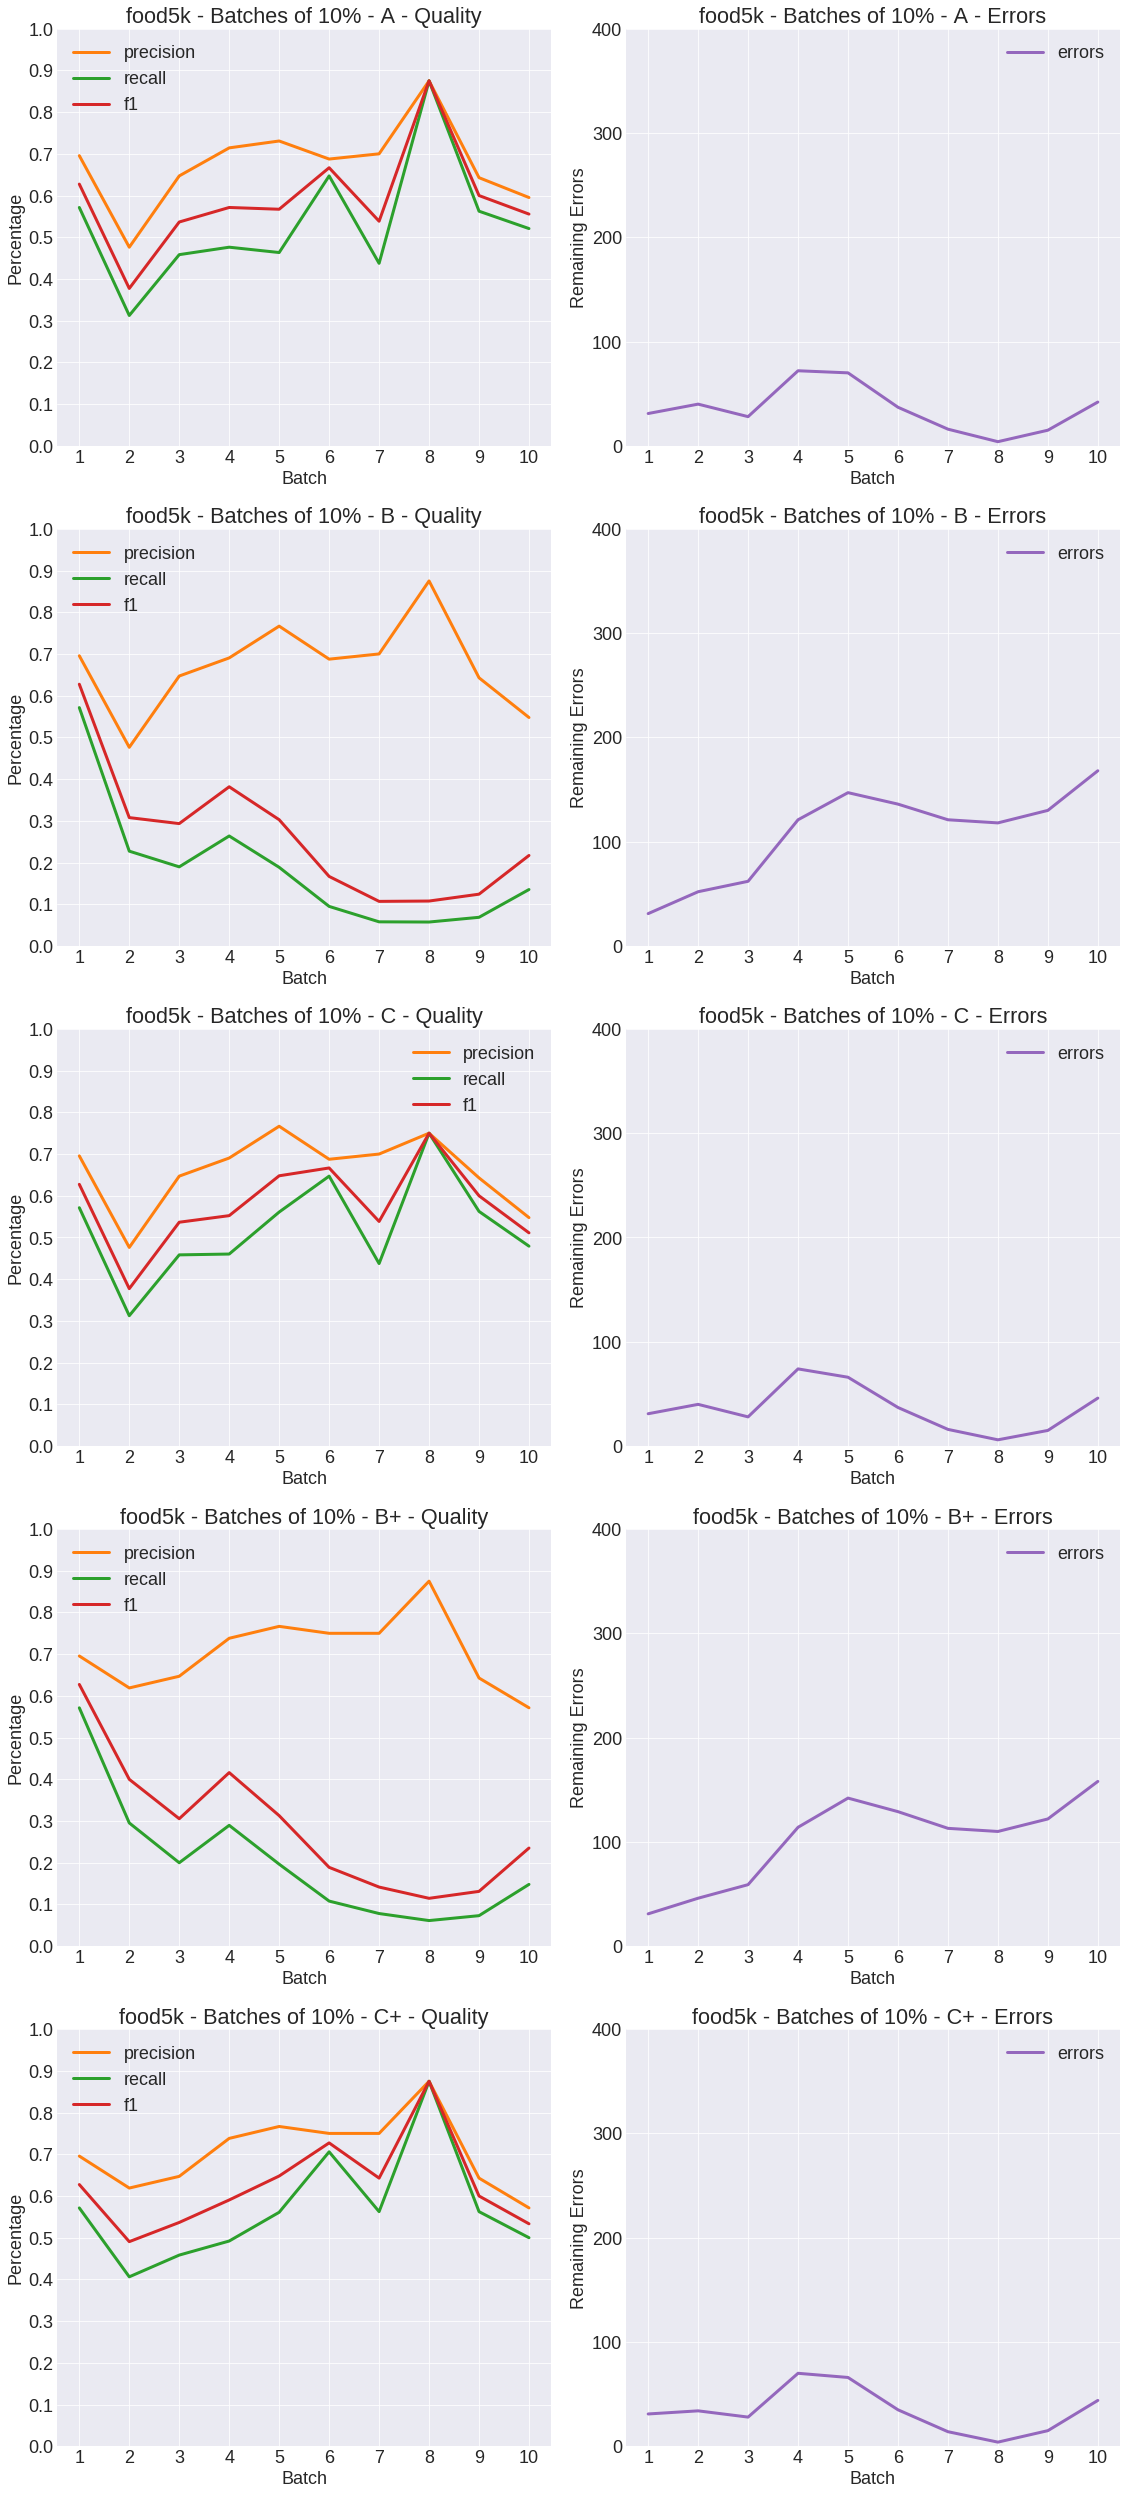

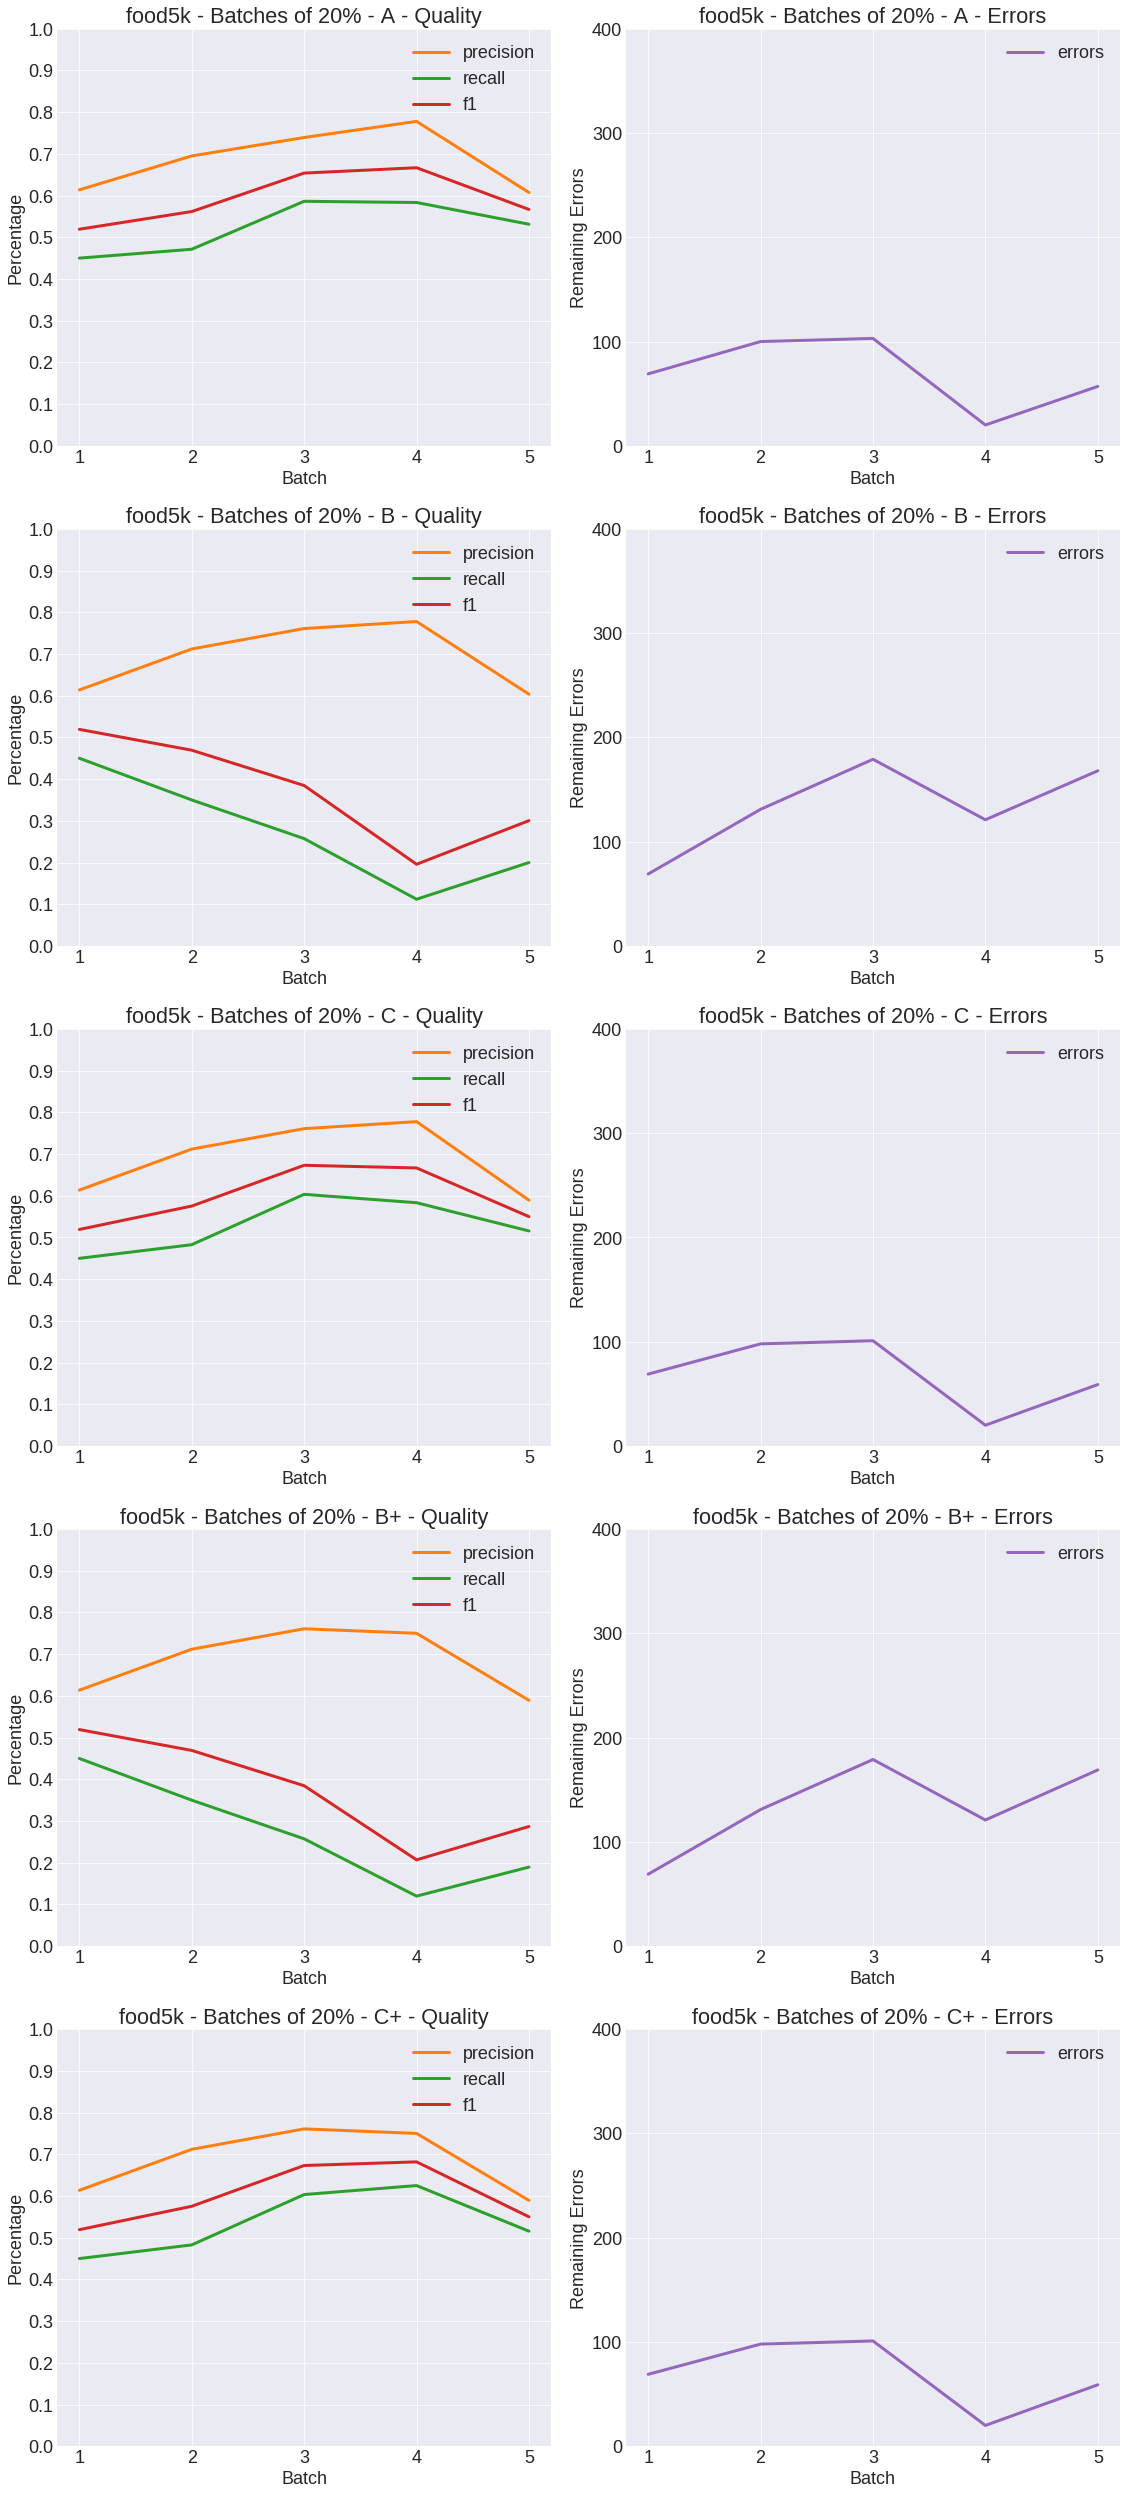

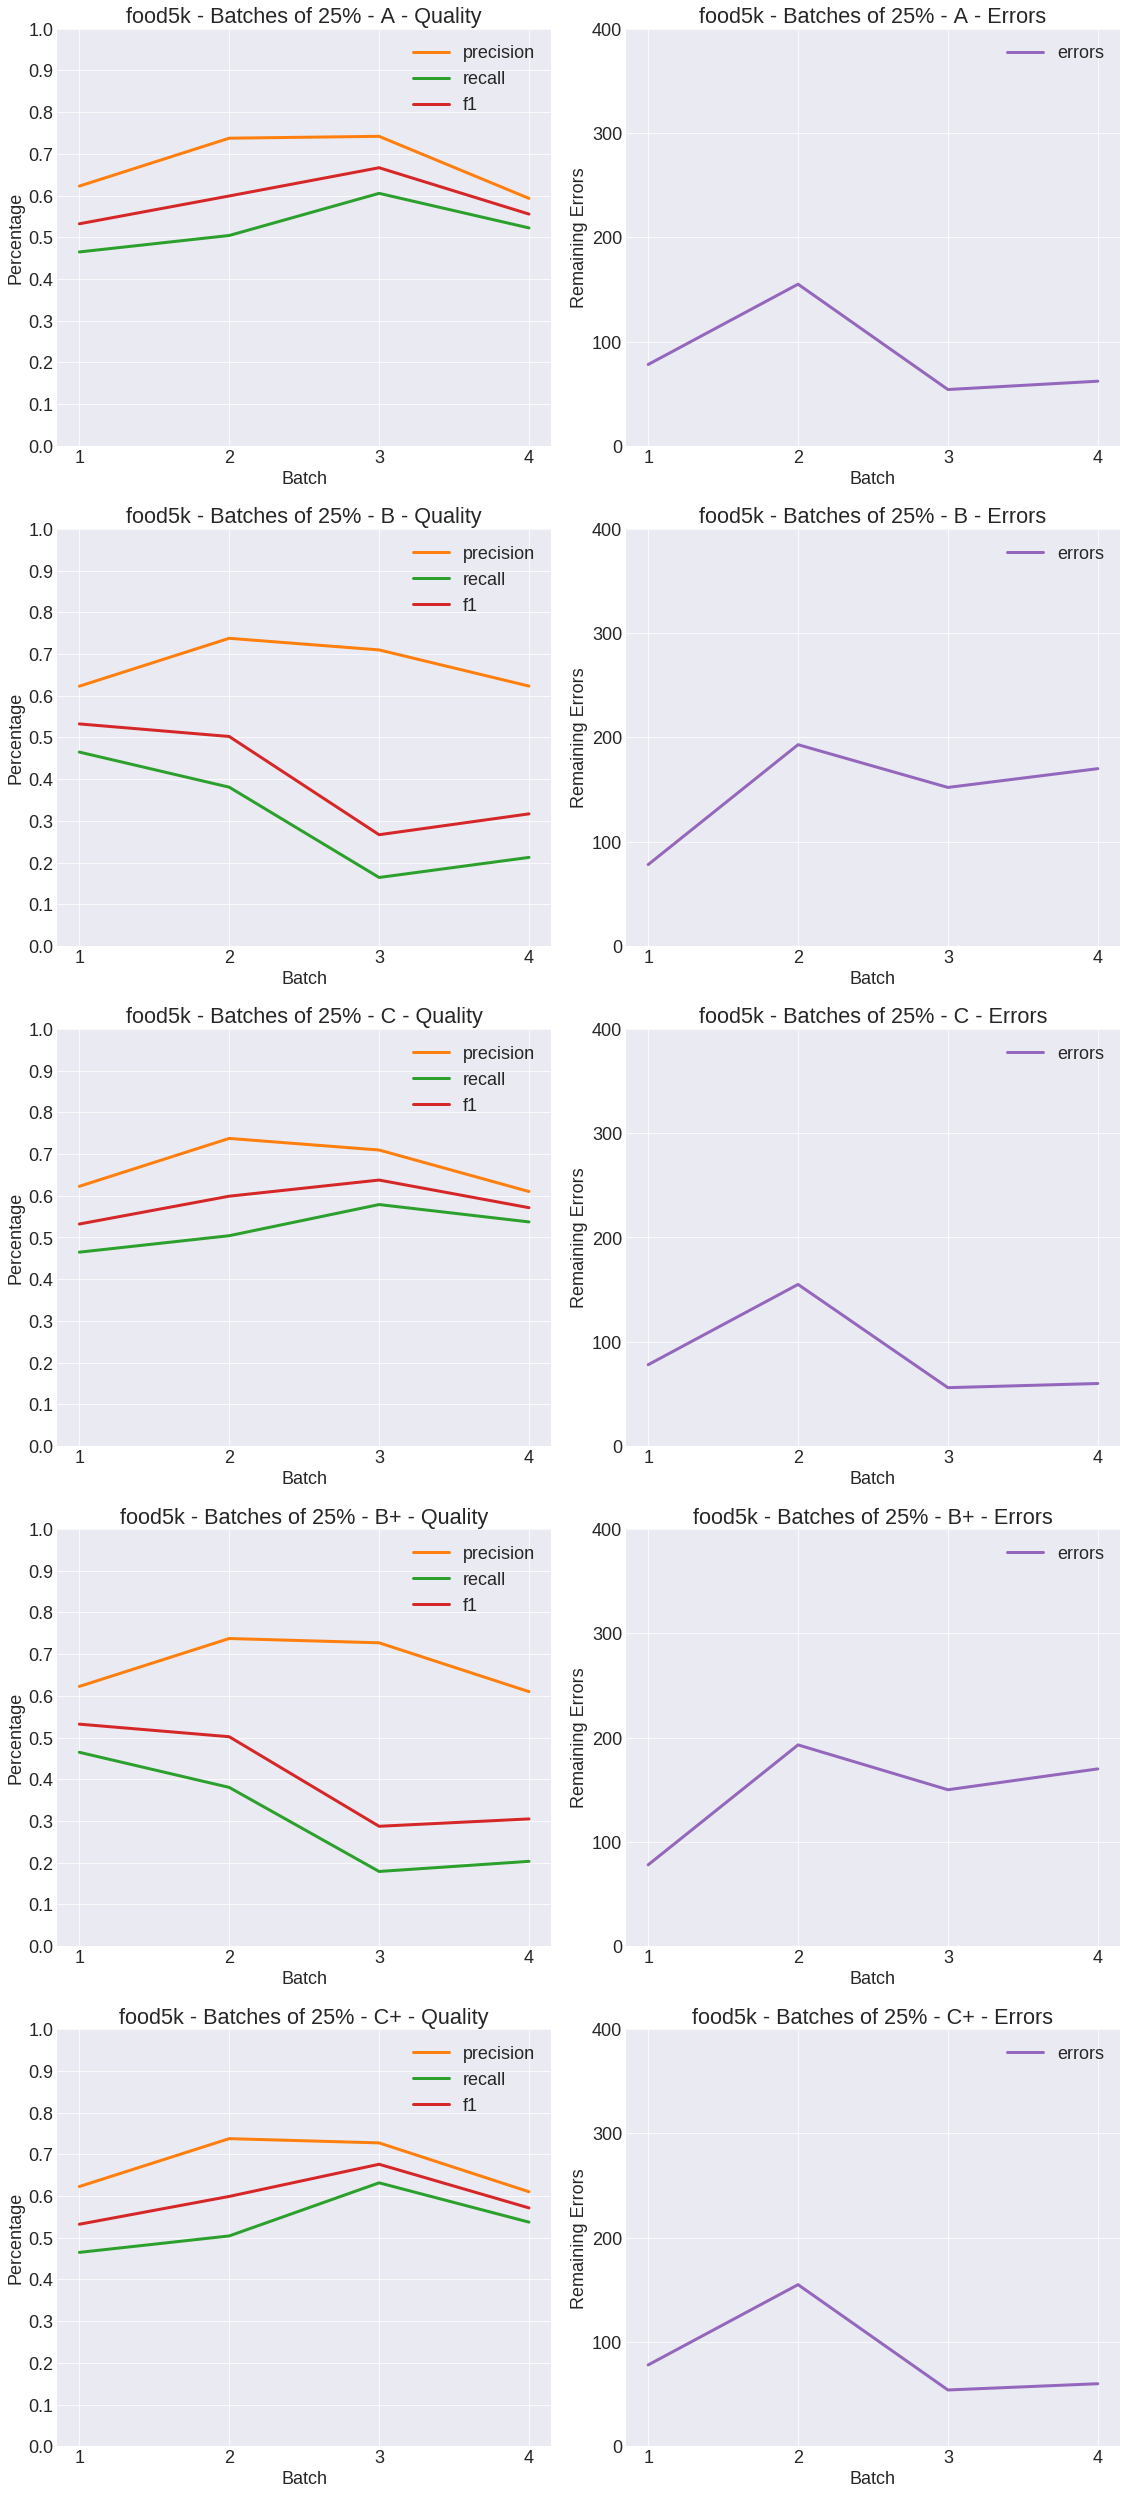

In [6]:
########################################
# food5k
########################################

food5k_a, food5k_maximum_errors_a = setup_df_list('food5k/co_a_quality_log.csv')
food5k_b, food5k_maximum_errors_b = setup_df_list('food5k/co_b_quality_log.csv')
food5k_c, food5k_maximum_errors_c = setup_df_list('food5k/co_c_quality_log.csv')
food5k_bplus, food5k_maximum_errors_bplus = setup_df_list('food5k/co_bplus_quality_log.csv')
food5k_cplus, food5k_maximum_errors_cplus = setup_df_list('food5k/co_cplus_quality_log.csv')

food5k_df_list = [food5k_a, food5k_b, food5k_c, food5k_bplus, food5k_cplus]

food5k_percentage_list = [5, 10, 20, 25]

food5k_maximum_remaining_errors = max(food5k_maximum_errors_a,
                                      food5k_maximum_errors_b,
                                      food5k_maximum_errors_c,
                                      food5k_maximum_errors_bplus,
                                      food5k_maximum_errors_cplus)

plot_charts('food5k', food5k_df_list, food5k_percentage_list, food5k_maximum_remaining_errors)

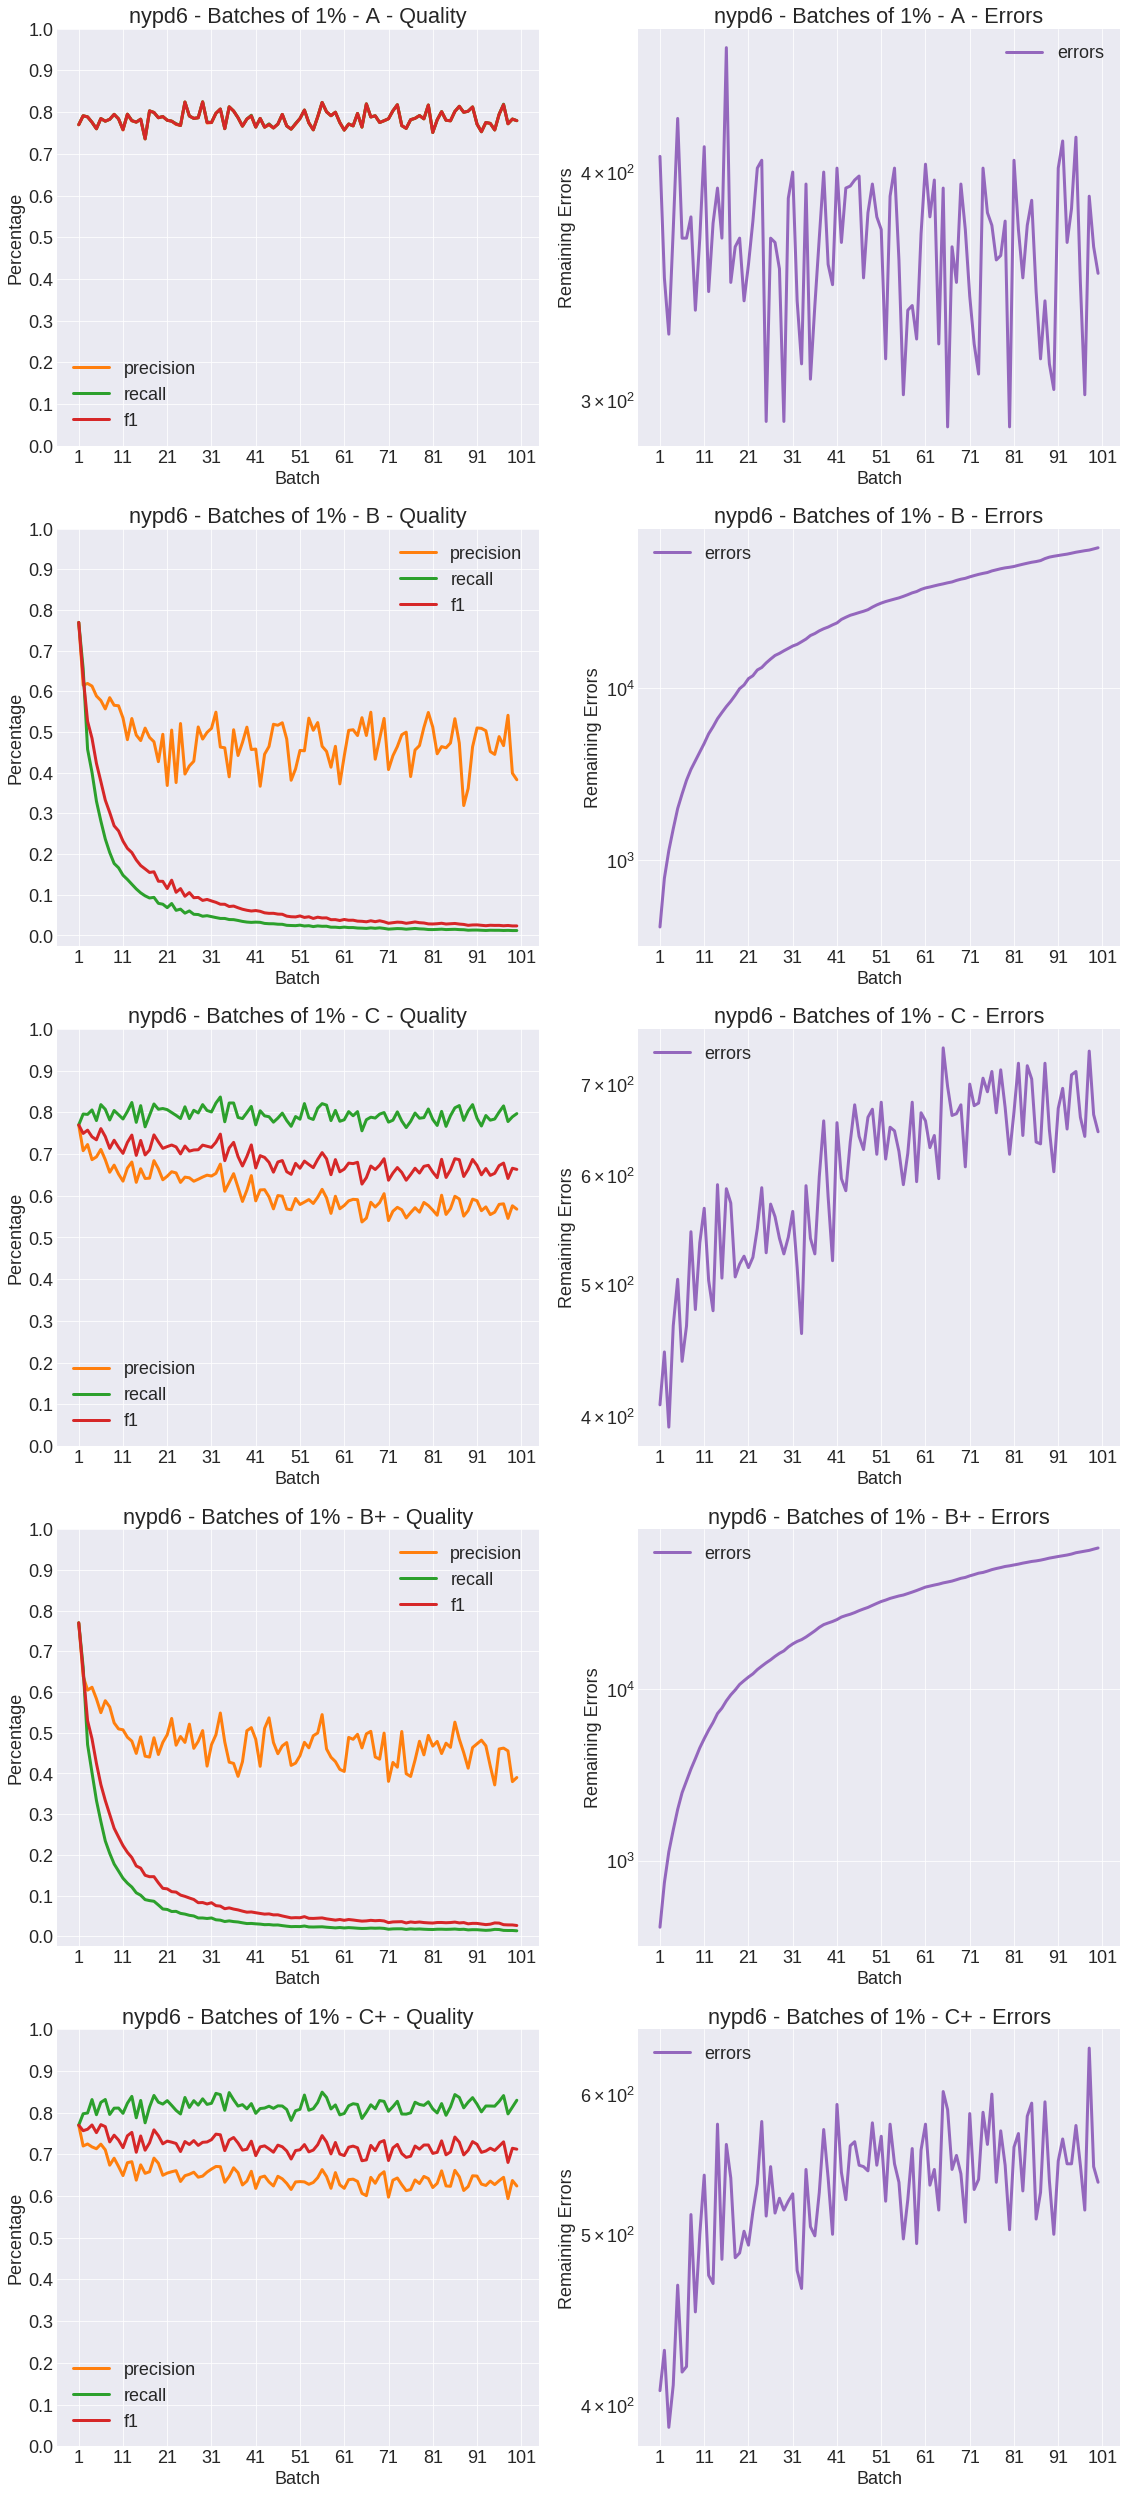

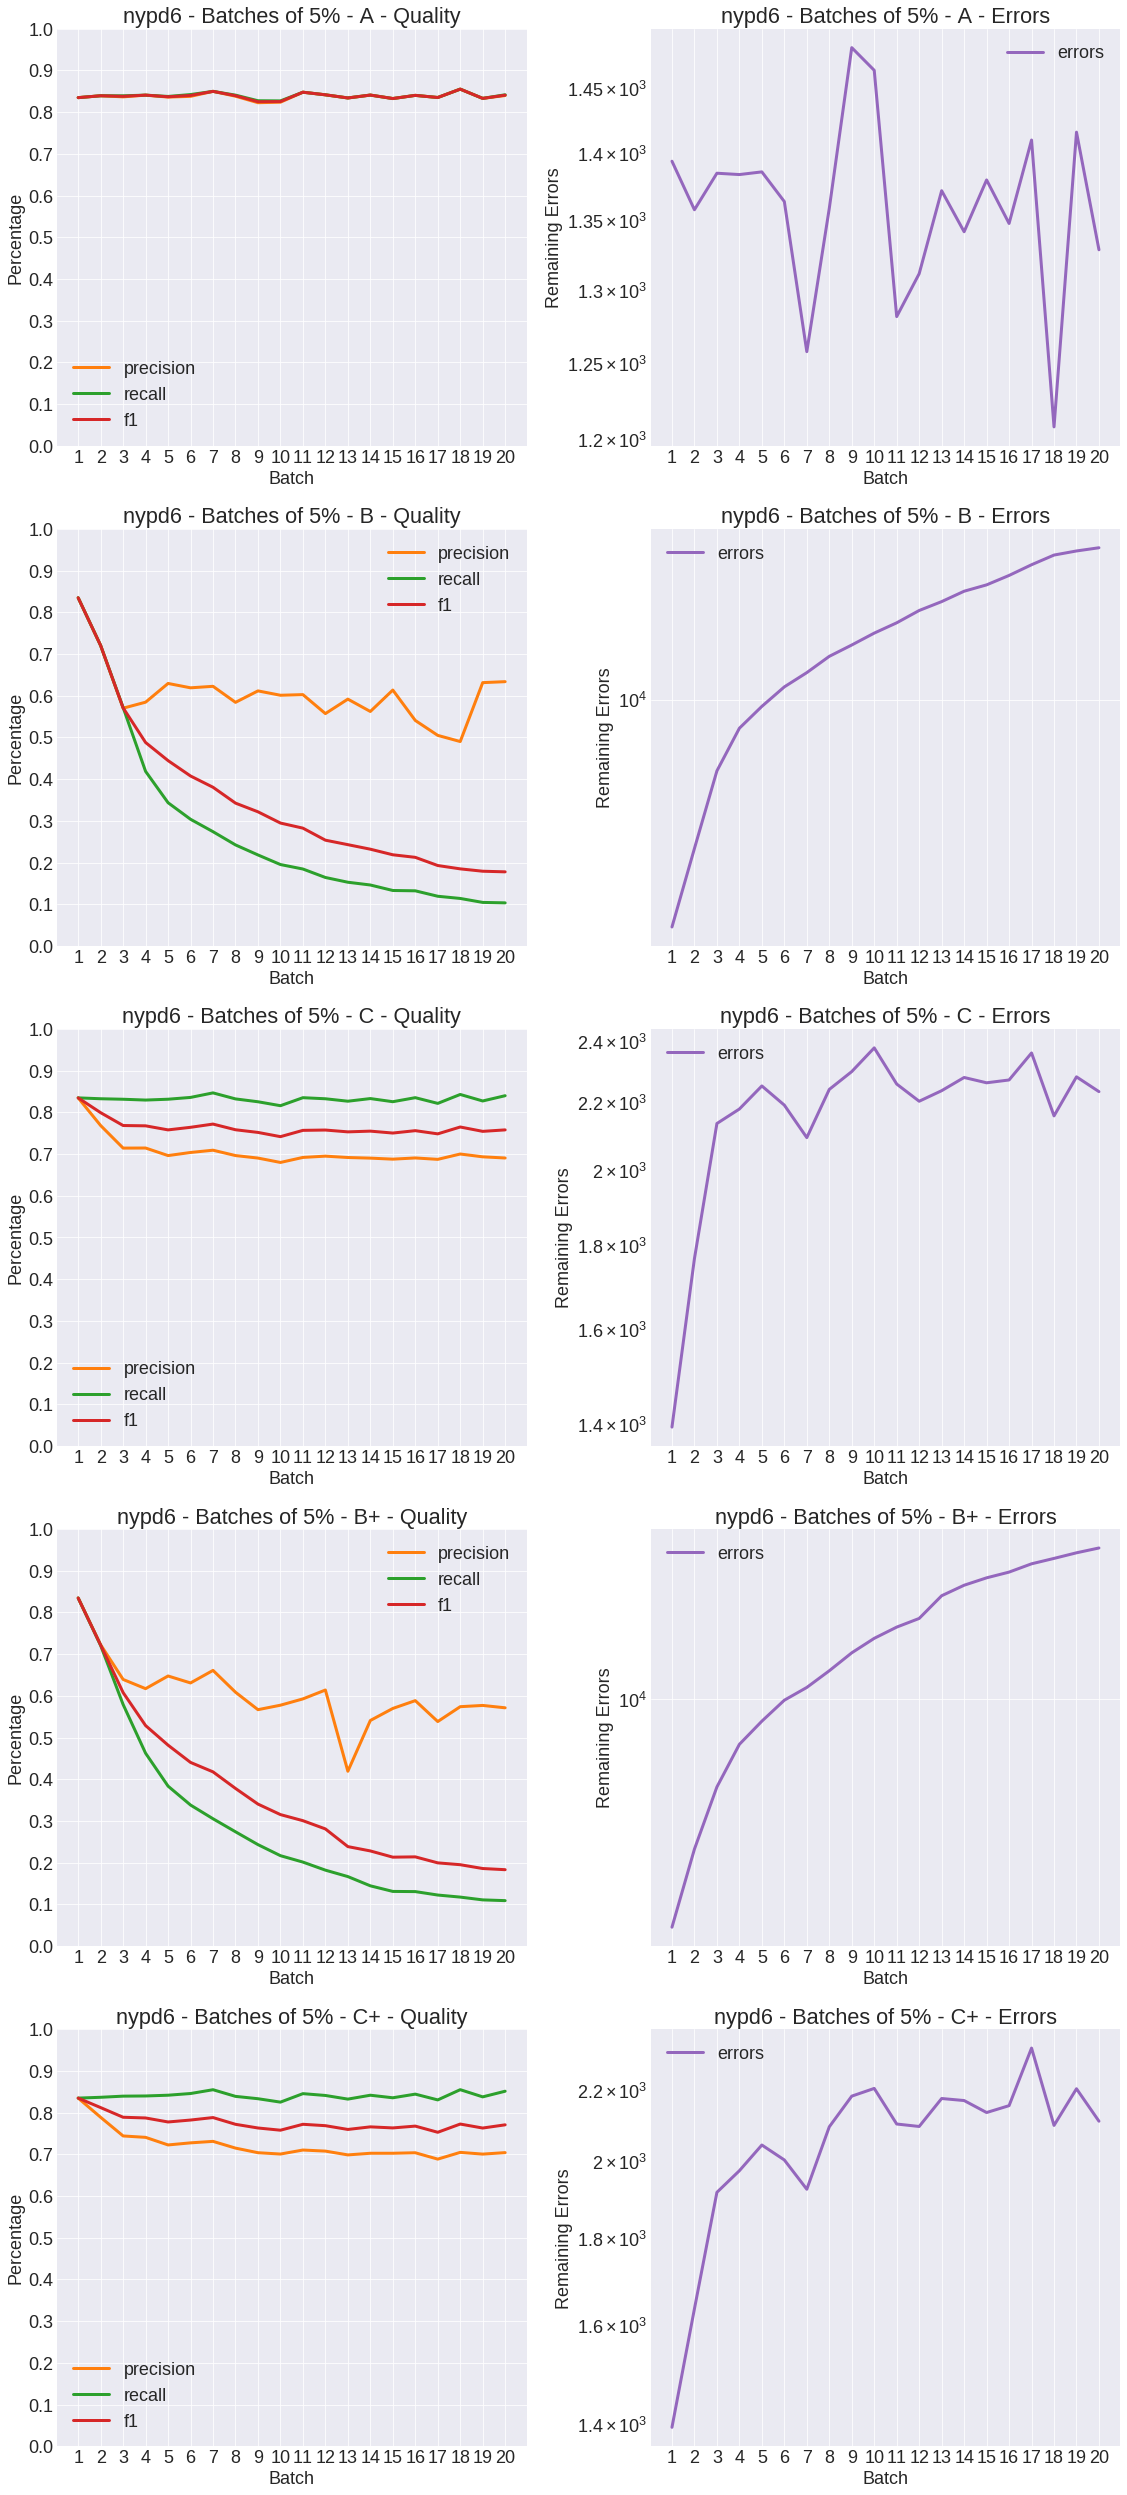

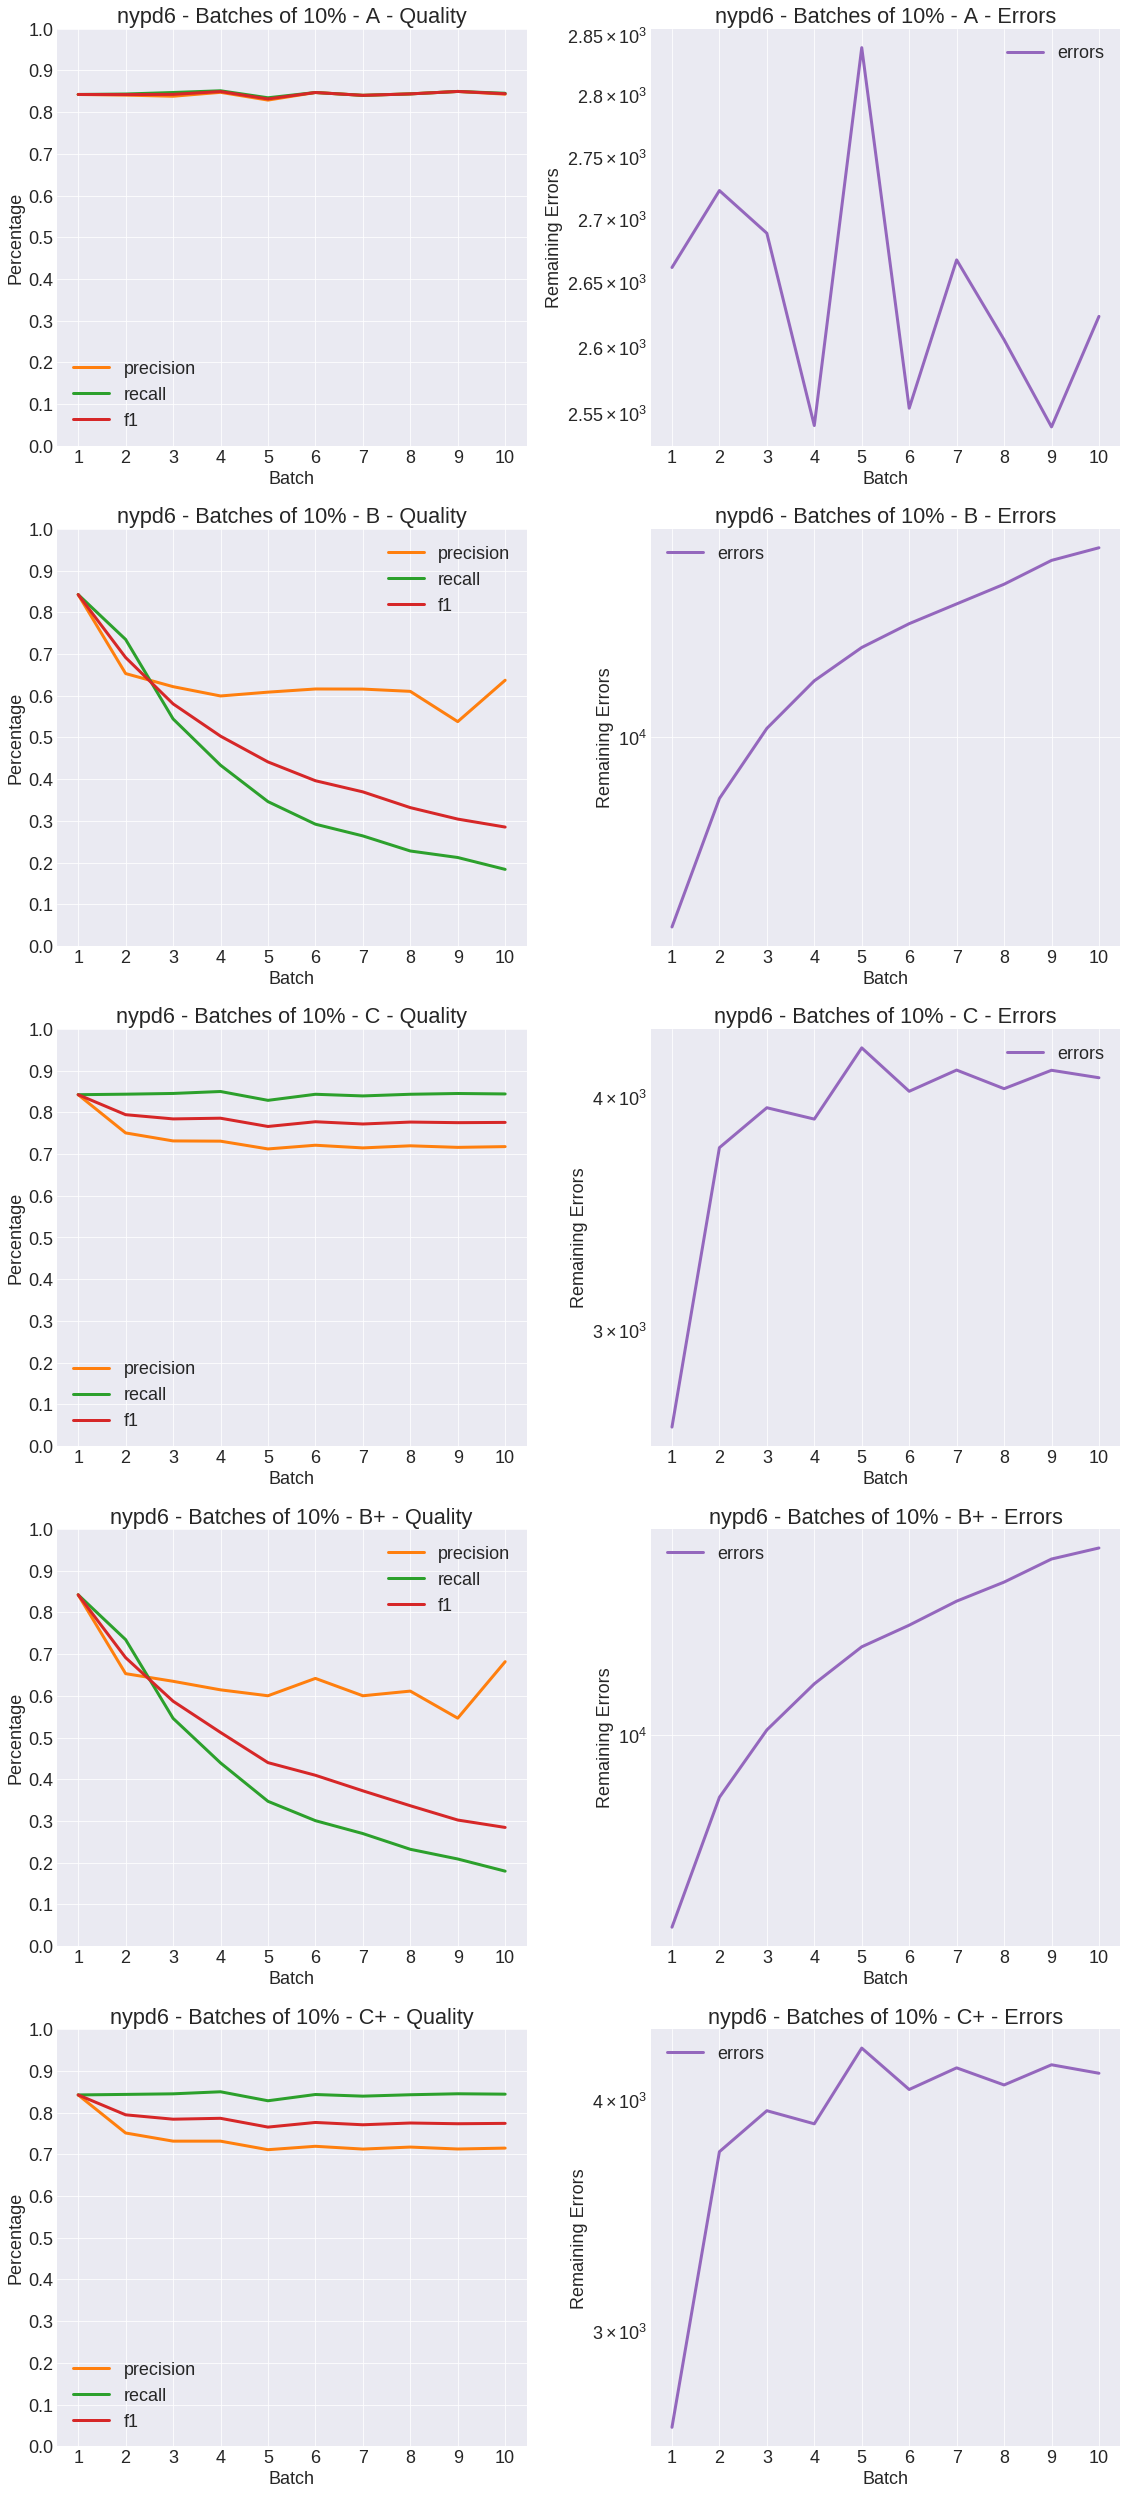

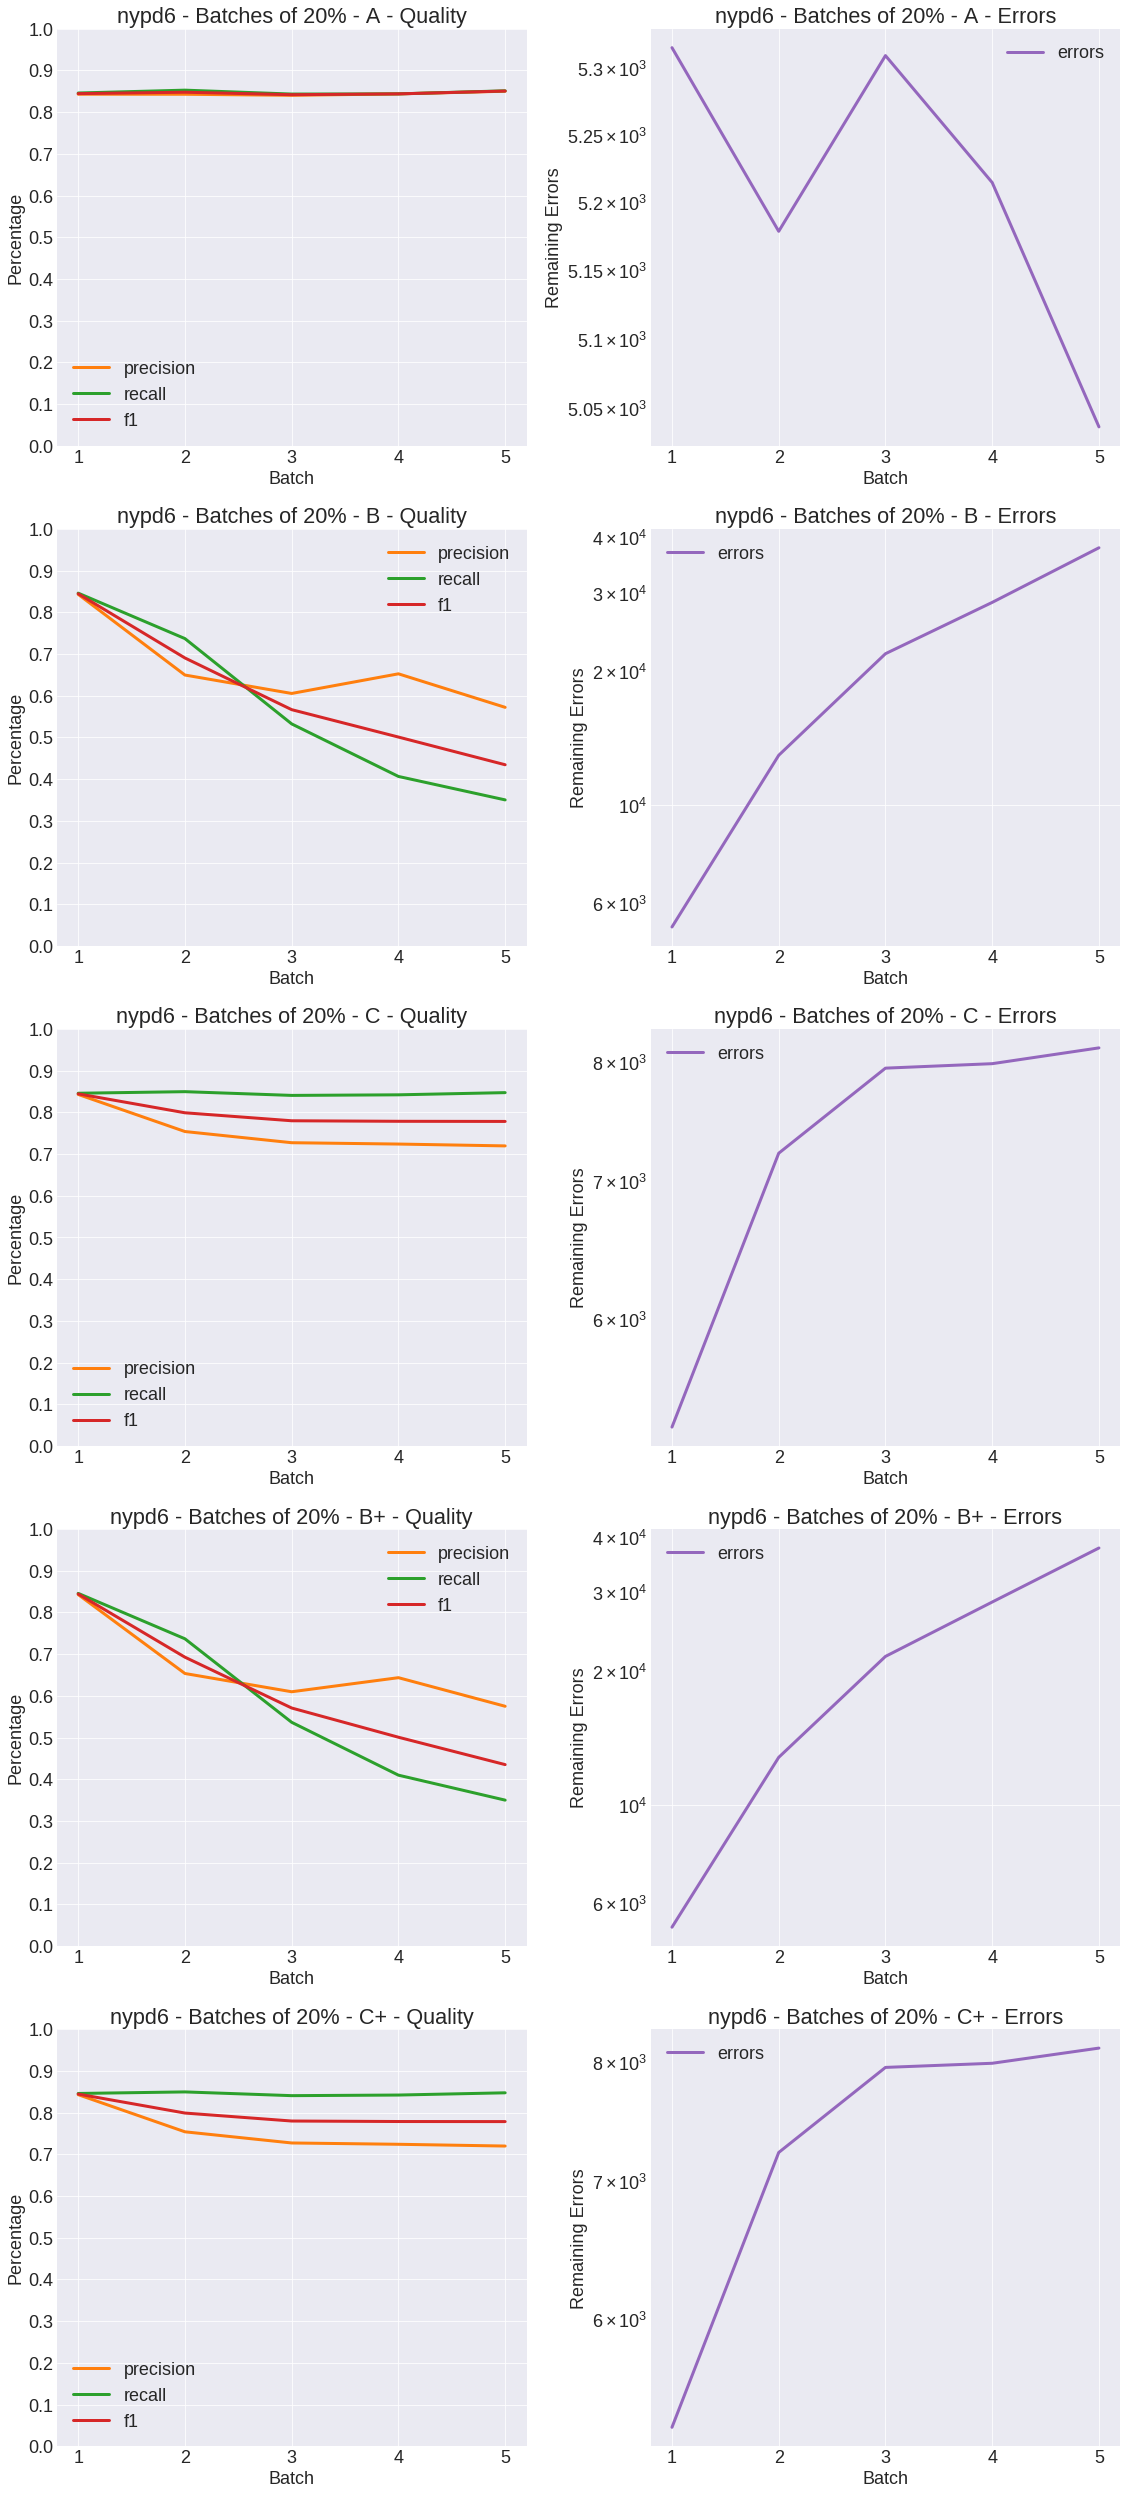

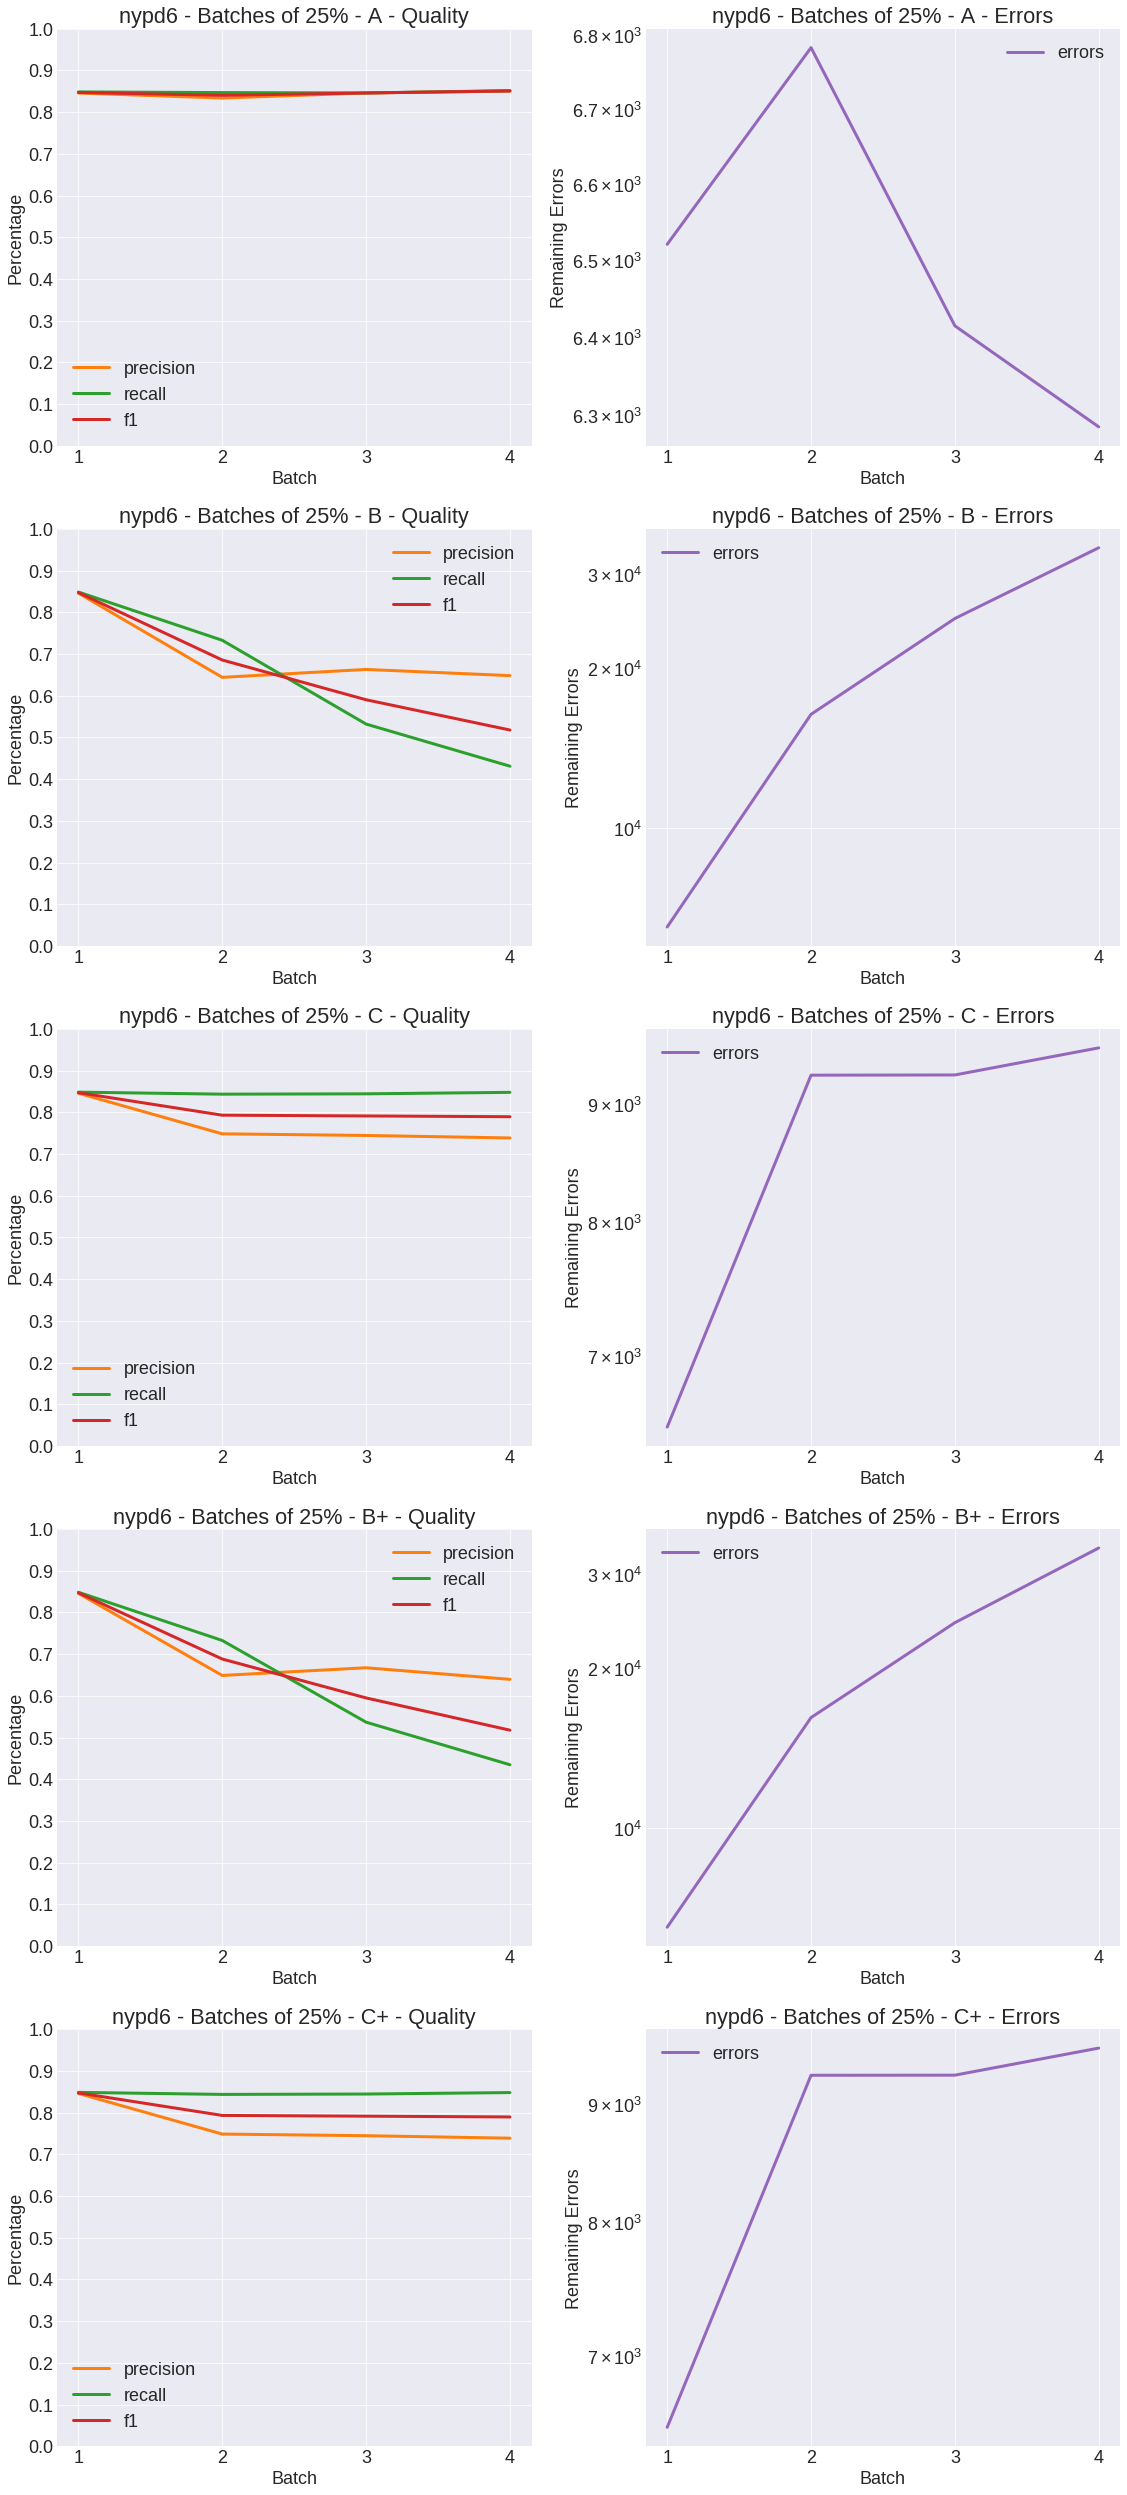

In [7]:
########################################
# nypd6
########################################

nypd6_a, nypd6_maximum_errors_a = setup_df_list('nypd6/co_a_quality_log.csv')
nypd6_b, nypd6_maximum_errors_b = setup_df_list('nypd6/co_b_quality_log.csv')
nypd6_c, nypd6_maximum_errors_c = setup_df_list('nypd6/co_c_quality_log.csv')
nypd6_bplus, nypd6_maximum_errors_bplus = setup_df_list('nypd6/co_bplus_quality_log.csv')
nypd6_cplus, nypd6_maximum_errors_cplus = setup_df_list('nypd6/co_cplus_quality_log.csv')

nypd6_df_list = [nypd6_a, nypd6_b, nypd6_c, nypd6_bplus, nypd6_cplus]

nypd6_percentage_list = [1, 5, 10, 20, 25]

nypd6_maximum_remaining_errors = max(nypd6_maximum_errors_a,
                                     nypd6_maximum_errors_b,
                                     nypd6_maximum_errors_c,
                                     nypd6_maximum_errors_bplus,
                                     nypd6_maximum_errors_cplus)

plot_charts('nypd6', nypd6_df_list, nypd6_percentage_list, nypd6_maximum_remaining_errors)